# Bike Sharing Assignment
This assignment is a programming assignment wherein we will build a multiple linear regression model for the prediction of demand for shared bikes.

## Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

## Business Goal
To model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# 1. Data Preperation

## 1.1 Data Understanding

In this section we would try to understand the data available to us in form of csv file and try to find out if there is any data quality issue

The dataset contains the following columns:
- `instant`: record index
- `dteday` : date
- `season` : season (1:spring, 2:summer, 3:fall, 4:winter)
- `yr` : year (0: 2018, 1:2019)
- `mnth` : month ( 1 to 12)
- `holiday` : weather day is a holiday or not
- `weekday` : day of the week
- `workingday` : if day is neither weekend nor holiday is 1, otherwise is 0.
- `weathersit` : 
	- `1`: Clear, Few clouds, Partly cloudy, Partly cloudy
	- `2`: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- `3`: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- `4`: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- `temp` : temperature in Celsius
- `atemp`: feeling temperature in Celsius
- `hum`: humidity
- `windspeed`: wind speed
- `casual`: count of casual users
- `registered`: count of registered users
- `cnt`: count of total rental bikes including both casual and registered


In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from scipy import stats

In [2]:
# Read the csv file using pandas
df = pd.read_csv("day.csv")
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [3]:
# Get the shape of the data
df.shape

(730, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Columns with Missing data
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# Columns with single unique values or Unique and null values
df.columns[df.nunique()==1]

Index([], dtype='object')

In [7]:
# Describe the dataset
df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [8]:
# Find Number of duplicate rows if any
df.duplicated().sum()

np.int64(0)

### 1.1.1 Row Analysis

- **Duplicate Rows:** No Duplicate rows in the dataset.
- **Extra Rows and Header Footer Rows:** Not present

### 1.1.2 Dataset Column Analysis

- There are 730 records and 16 columns in the dataset.
- No missing values found in the dataset.
- Datatype classification:
  - Continuous variables: `temp`, `atemp`, `hum`, `windspeed`, `cnt`, `casual`, `registered`.
  - Categorical variable:  `season`, `weathersit`, `weekday`, `holiday`, `workingday`, `yr`, `month`.
- `cnt` (count of total rental bikes) is our primary variable ot target variable

##### Columns that can be removed:
- `instant` (Index Column) - Just a row index, not useful for prediction.
- `dteday` (Date) - The information is already captured in `mnth`, `weekday`, and `yr`.
- `casual`, `registered` - These are components of `cnt`, creating data leakage in prediction.

##### Derived Columns

##### Outlier Handling

## 1.2 Data Cleaning and Transforming

### 1.2.1 Removing Columns Not required of this Analysis

Columns to be removed:
- `instant` (Index Column) - Just a row index, not useful for prediction.
- `dteday` (Date) - The information is already captured in `mnth`, `weekday`, and `yr`.
- `casual`, `registered` - These are components of `cnt`, creating data leakage in prediction.

In [9]:
#list of columns to be removed
columns_to_remove = ['instant', 'dteday', 'casual', 'registered']

In [10]:
# Deleting the Irrelevant columns
df = df.drop(columns_to_remove, axis = 1)

In [11]:
df.shape

(730, 12)

<Axes: >

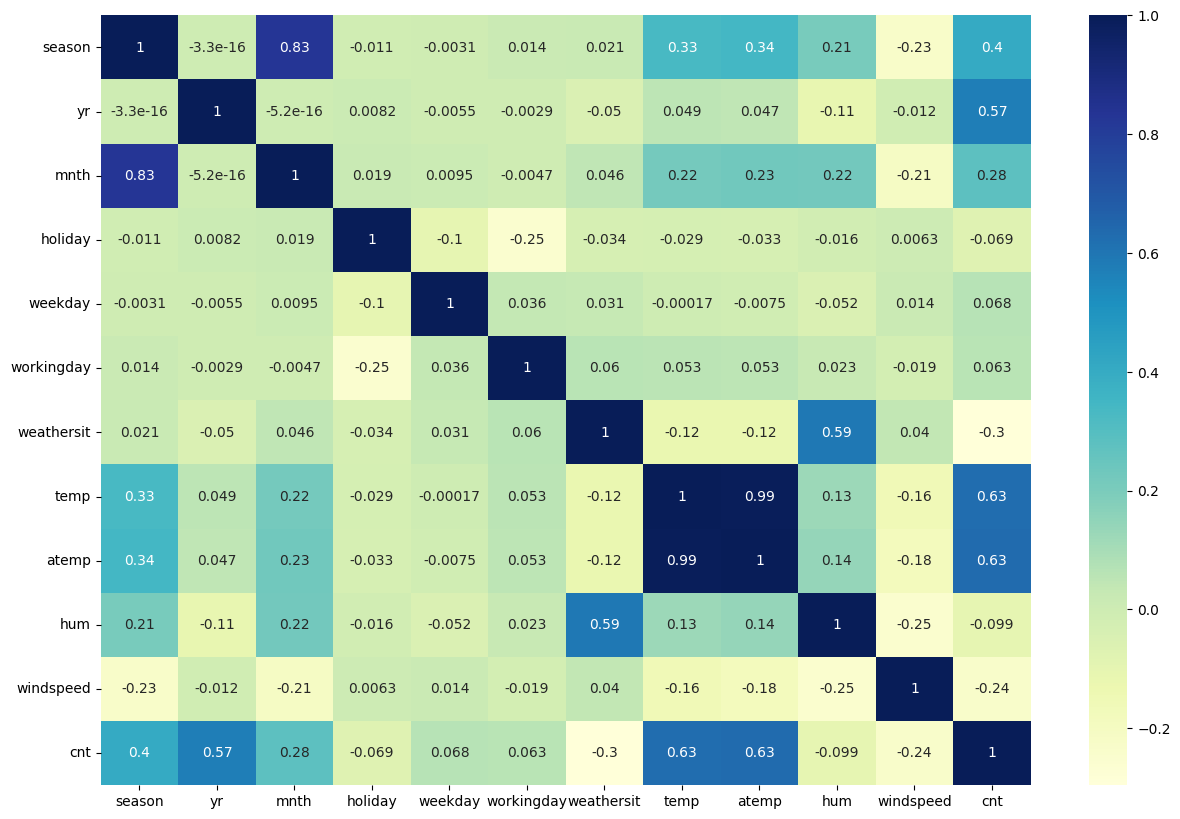

In [12]:
# Heatmap on raw data
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True)

### 1.2.2 Analysis of Continuous Variables
Continuous variables: `temp`, `atemp`, `hum`, `windspeed`, `cnt`.


In [13]:
# List of continuous variables
cont_var_list = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

#### 1.2.2.1 Outlier Analysis for Continuous Variables

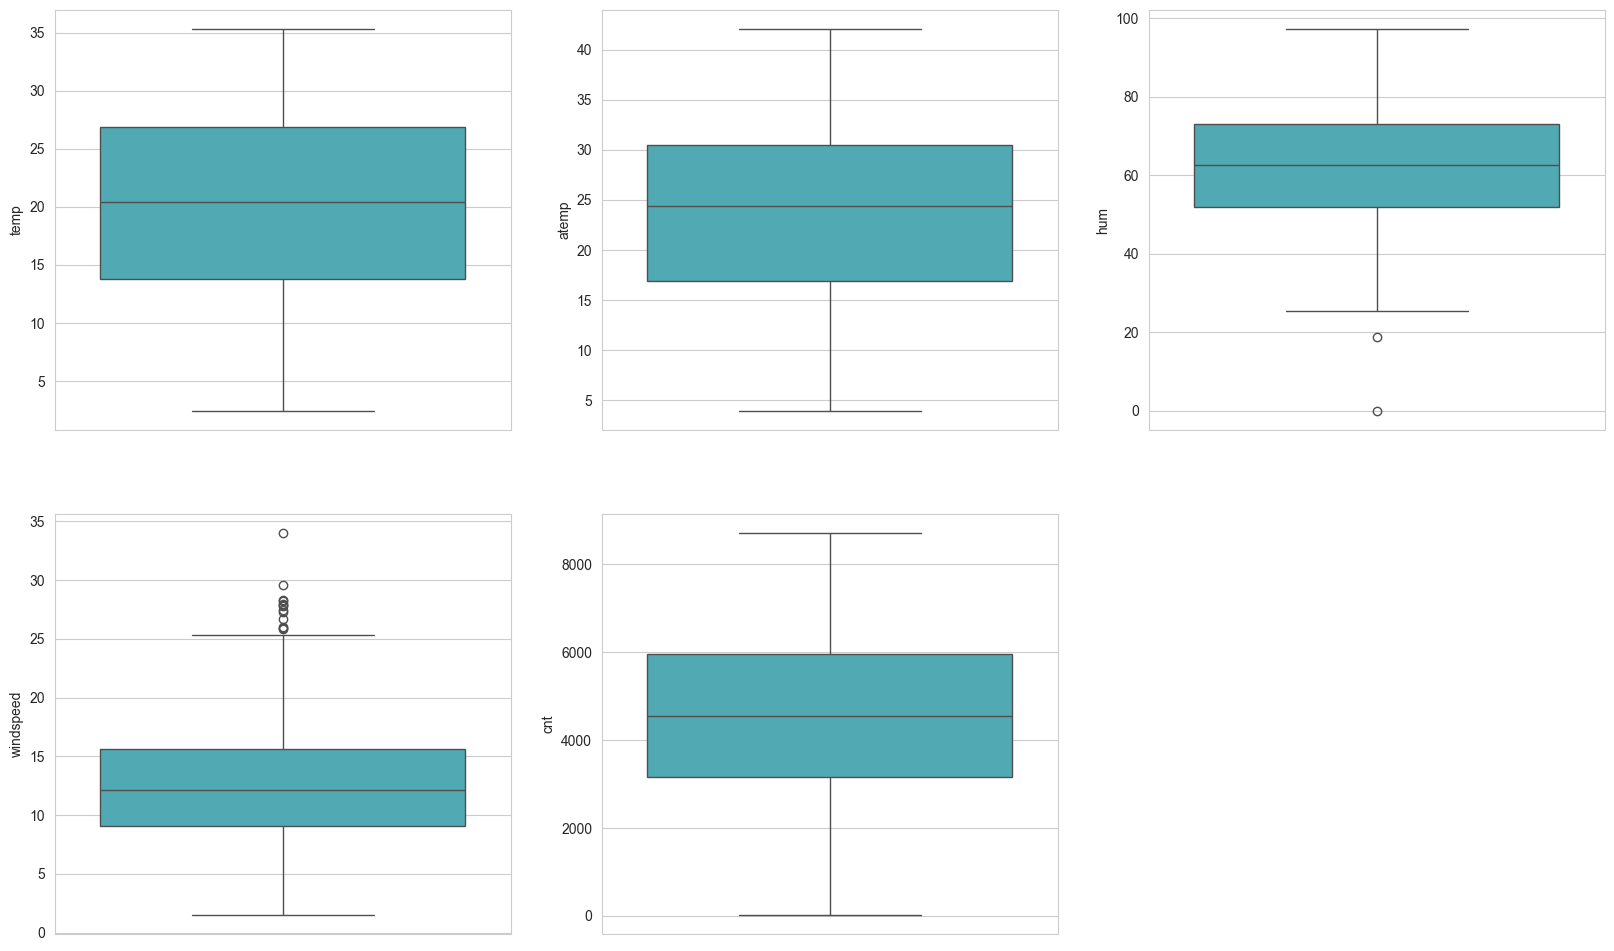

In [14]:
# Boxplot for continuous variables
sns.set_style("whitegrid")
plt.figure(figsize=(20, 12))
position=1
for column in cont_var_list:
    plt.subplot(2,3,position)
    #df[column].plot.box()
    sns.boxplot(y=df[column],palette='YlGnBu')
    position = position+1
plt.show()

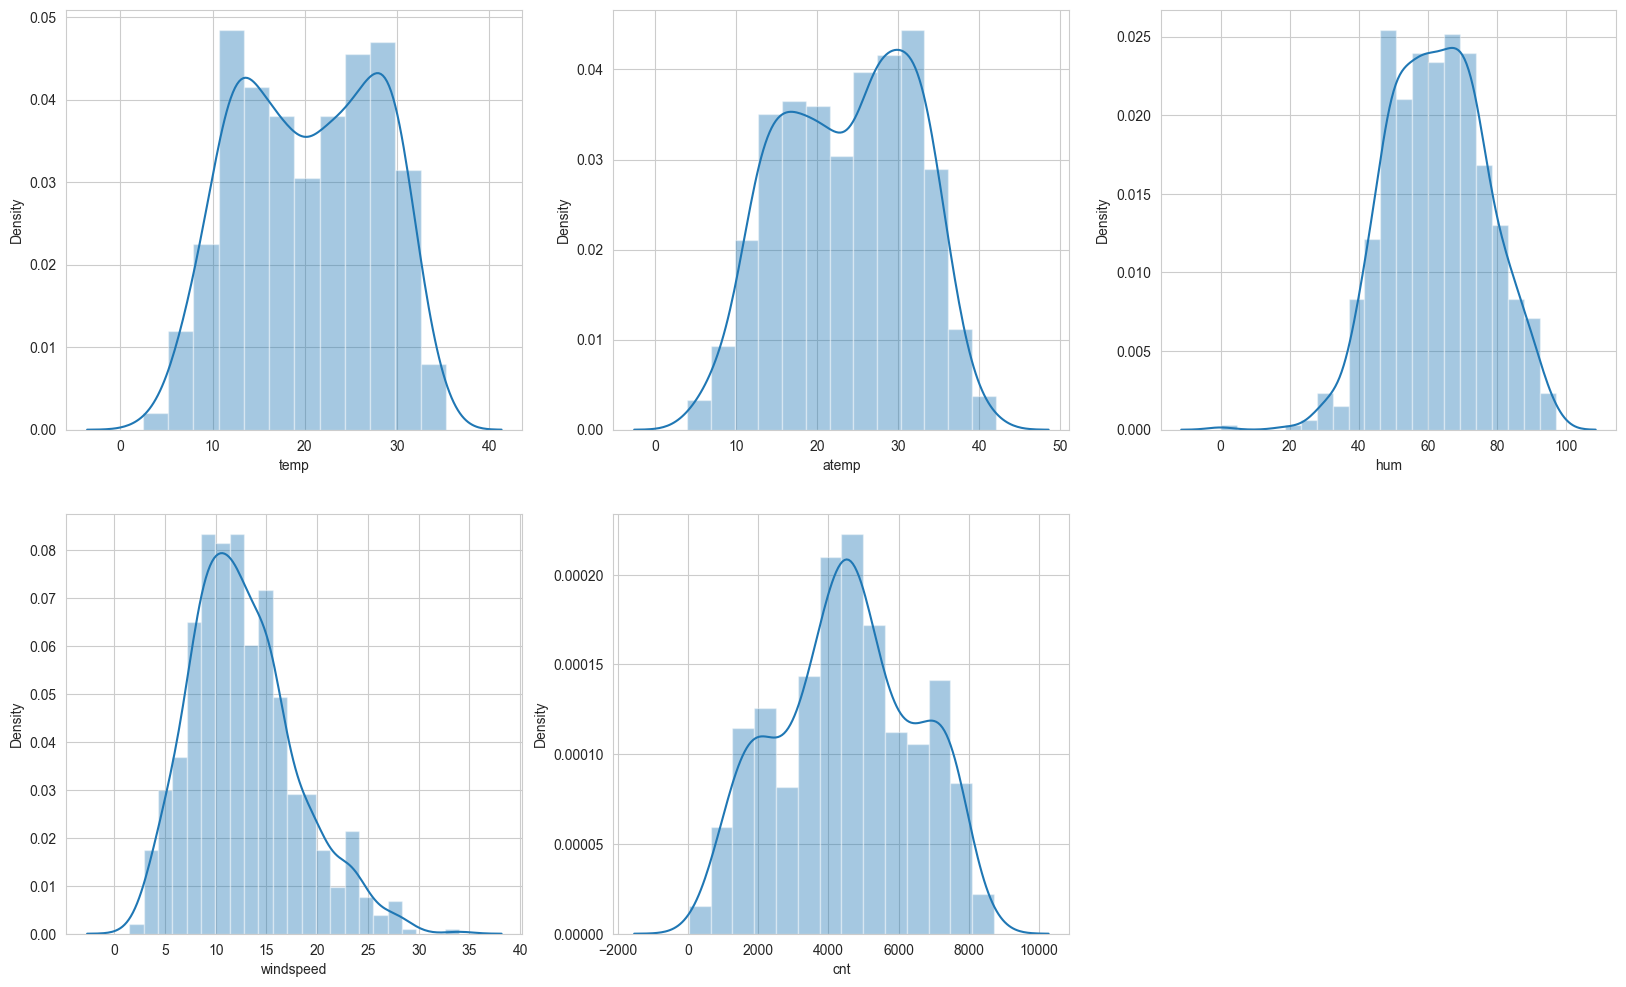

In [15]:
# Distribution plot for continuous variables
sns.set_style("whitegrid")
plt.figure(figsize=(20, 12))
position=1
for column in cont_var_list:
    plt.subplot(2,3,position)
    #df[column].plot.box()
    sns.distplot(x=df[column])
    plt.xlabel(column)
    position = position+1
plt.show()

#### Observation
- `hum` and `windspeed` has few outliers, others looks fine.
- from the distribution plot, `windspeed` seems to be right skewed and there are few outliers in right side as well.
- `hum` hs few outliers in the left side.

In [16]:
# Outlier for windspeed using IQR method
# Calculate Q1 and Q3
Q1 = df['windspeed'].quantile(0.25)
Q3 = df['windspeed'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Identify outliers
df[(df['windspeed'] > upper_bound) | (df['windspeed'] < lower_bound)]

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
44        1   0     2        0        1           1           1  17.015000   
49        1   0     2        0        6           0           1  16.365847   
93        2   0     4        0        1           1           1  23.506653   
94        2   0     4        0        2           1           2  16.980847   
292       4   0    10        0        4           1           1  19.509153   
382       1   1     1        0        3           1           1  12.436653   
407       1   1     2        0        0           0           1   5.227500   
420       1   1     2        0        6           0           1  11.924153   
431       1   1     3        0        4           1           1  21.627500   
432       1   1     3        0        5           1           2  16.844153   
449       2   1     3        0        1           1           1  18.279153   
665       4   1    10        0        0           0           2  19.577500   
720       1   1    12        0        6           0           1  10.899153   

        atemp      hum  windspeed   cnt  
44   19.91750  37.5833  27.999836  1913  
49   19.57020  18.7917  34.000021  1635  
93   27.14645  42.6250  25.833257  3115  
94   19.91750  64.2083  26.000489  1795  
292  23.32625  63.6250  28.292425  4195  
382  13.76270  44.3333  27.833743  3376  
407   5.08290  46.4583  27.417204  1529  
420  12.78375  39.5833  28.250014  2732  
431  26.23020  56.7500  29.584721  5382  
432  19.85415  40.7083  27.791600  4569  
449  21.93750  47.7917  25.917007  5558  
665  23.38855  69.4583  26.666536  4459  
720  11.80565  44.1250  27.292182  1749

In [17]:
# Removing outliers
df = df[(df['windspeed'] <= upper_bound) & (df['windspeed'] >= lower_bound)]

In [18]:
# Outlier for hum using IQR method
# Calculate Q1 and Q3
Q1 = df['hum'].quantile(0.25)
Q3 = df['hum'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Identify outliers
df[(df['hum'] > upper_bound) | (df['hum'] < lower_bound)]

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
68       1   0     3        0        4           1           3  15.952731   

      atemp  hum  windspeed  cnt  
68  19.2834  0.0  17.545759  623

In [19]:
# Removing outliers
df = df[(df['hum'] <= upper_bound) & (df['hum'] >= lower_bound)]

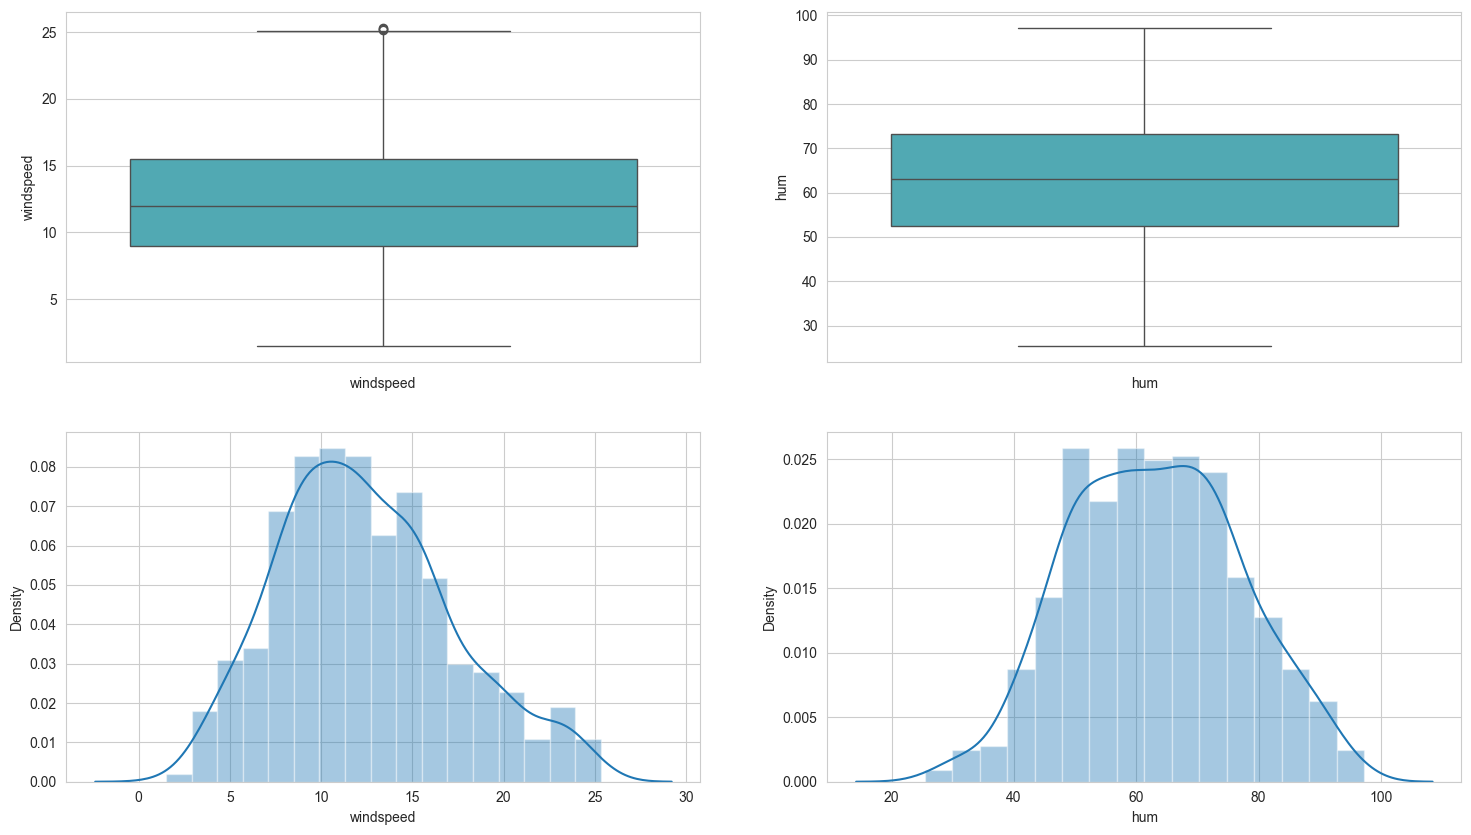

In [20]:
# Distribution plot for hum and windspeed post removal of outliers
sns.set_style("whitegrid")
plt.figure(figsize=(18, 10))
plt.subplot(2,2,1)
sns.boxplot(y=df['windspeed'],palette='YlGnBu')
plt.xlabel("windspeed")
plt.subplot(2,2,2)
sns.boxplot(y=df['hum'],palette='YlGnBu')
plt.xlabel("hum")
plt.subplot(2,2,3)
sns.distplot(x=df['windspeed'])
plt.xlabel("windspeed")
plt.subplot(2,2,4)
sns.distplot(x=df['hum'])
plt.xlabel("hum")
plt.show()

In [21]:
df.shape

(716, 12)

#### 1.2.2.2 Bivariate Analysis of Continuous Variables
Column `cnt` is our primary column for analysis. So, we will do bivariate analysis of other columns with `cnt`.

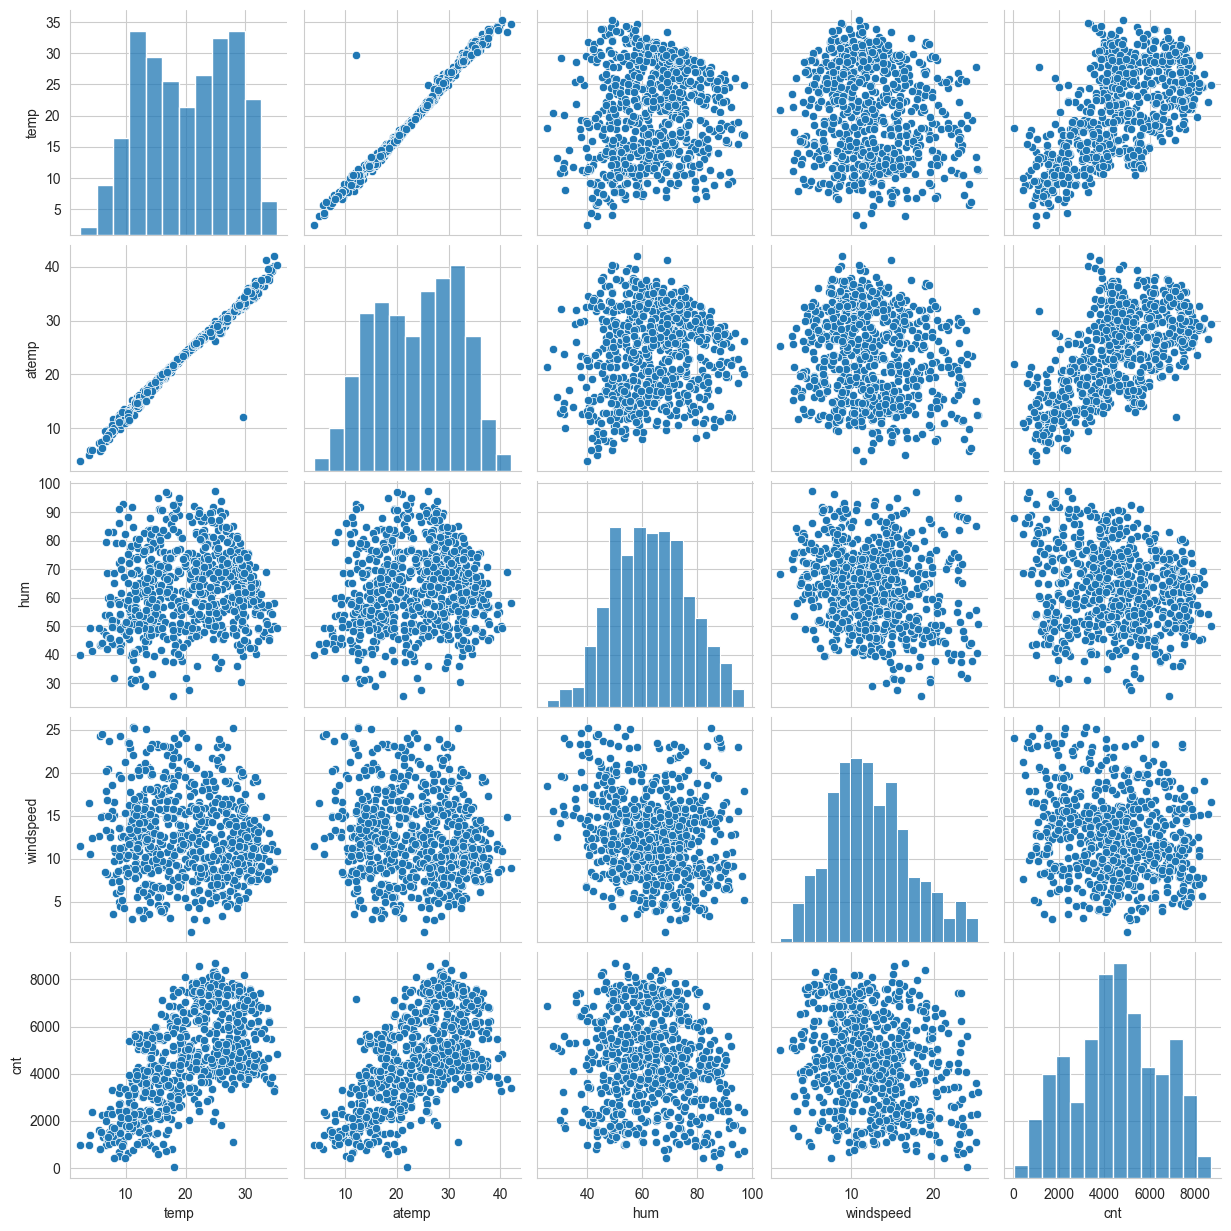

In [22]:
sns.pairplot(df[cont_var_list])
plt.show()

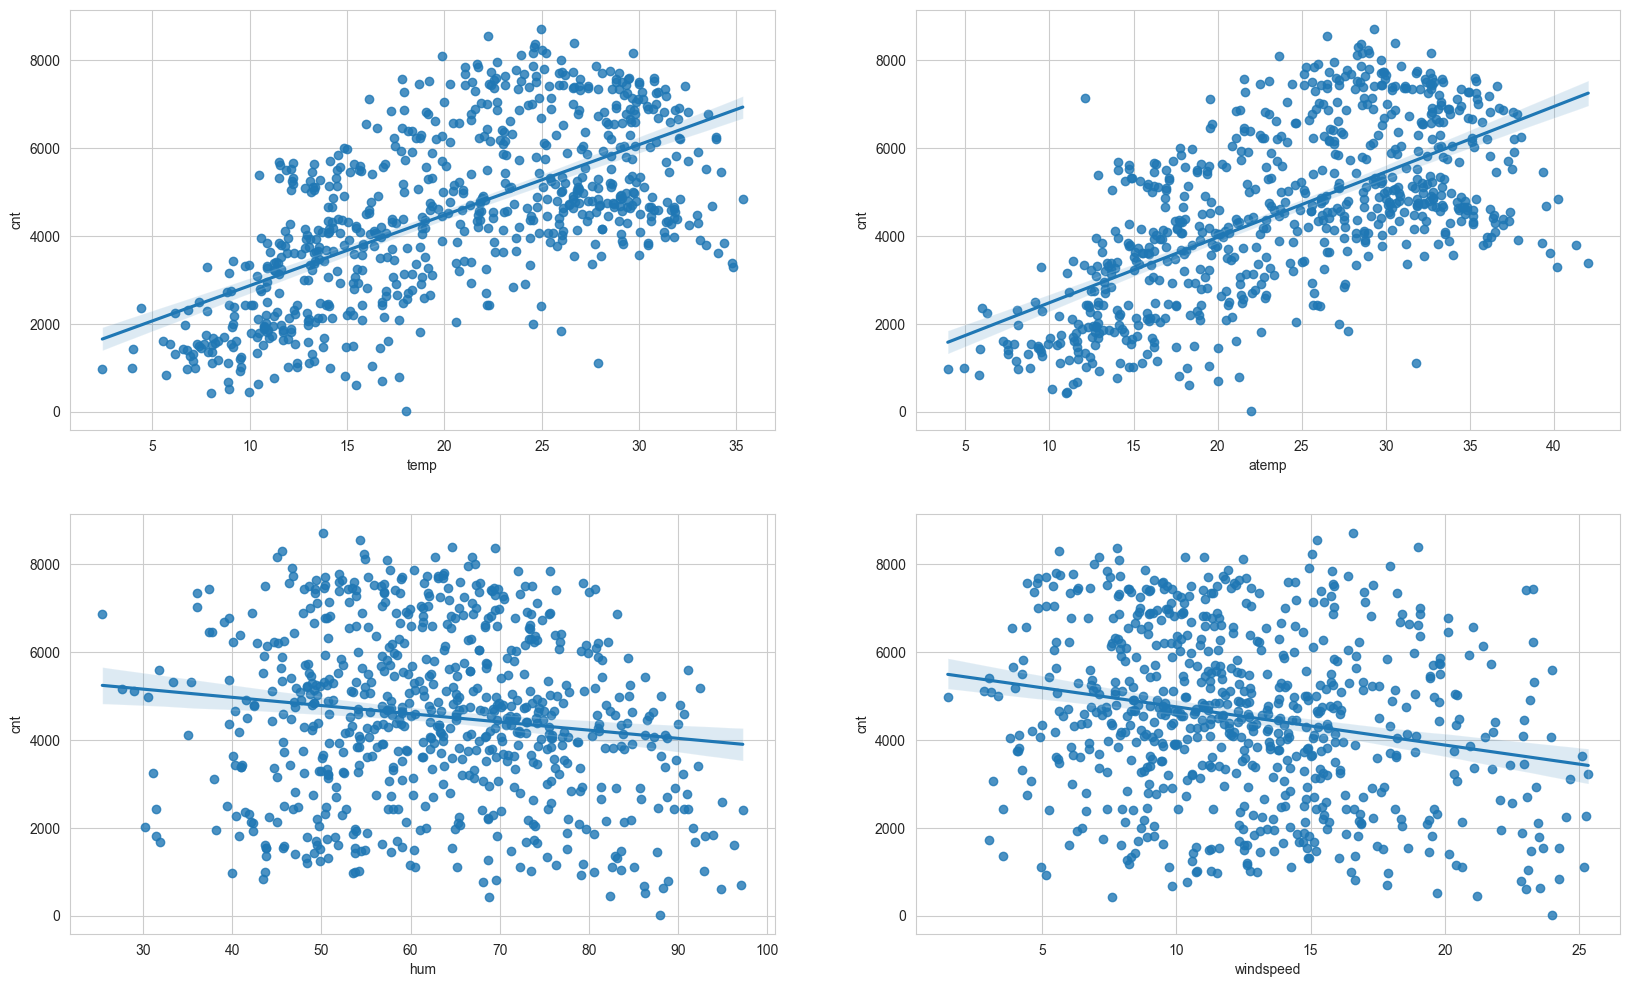

In [23]:
# Scatter plot for Continuous variables
sns.set_style("whitegrid")
plt.figure(figsize=(20, 12))
position=1
for column in ['temp', 'atemp', 'hum', 'windspeed']:
    plt.subplot(2,2,position)
    #df[column].plot.box()
    sns.regplot(x=column, y='cnt', data=df)
    position = position+1
plt.show()

#### 1.2.2.3 Correlation among Continuous Variables

<Axes: >

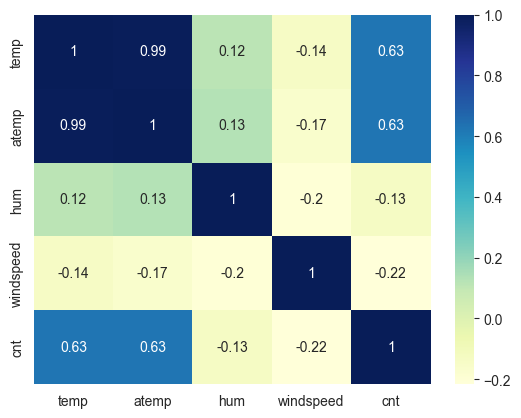

In [24]:
# Heatmap
sns.heatmap(df[cont_var_list].corr(), cmap='YlGnBu', annot=True)

#### Observations
- Correlation between feature variables `temp` and `atemp` is very high. so one of them needs to be removed to avoid multicollinearity.
- There is a strong strong +ve correlation between both `temp` and `atemp` with `cnt`.
- `hum` and `windspeed` have weak -ve correlation with `cnt`. 

#### 1.2.2.4 Dropping `atemp` to avoid multicollinearity

In [25]:
df = df.drop(['atemp'], axis = 1)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 716 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      716 non-null    int64  
 1   yr          716 non-null    int64  
 2   mnth        716 non-null    int64  
 3   holiday     716 non-null    int64  
 4   weekday     716 non-null    int64  
 5   workingday  716 non-null    int64  
 6   weathersit  716 non-null    int64  
 7   temp        716 non-null    float64
 8   hum         716 non-null    float64
 9   windspeed   716 non-null    float64
 10  cnt         716 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 67.1 KB


In [27]:
df.shape

(716, 11)

### 1.2.3 Visualisation of Categorical Variables

In [28]:
# List of categorical variables

cat_var_list = ['season', 'weathersit', 'weekday', 'holiday', 'workingday', 'yr', 'mnth']

<Axes: >

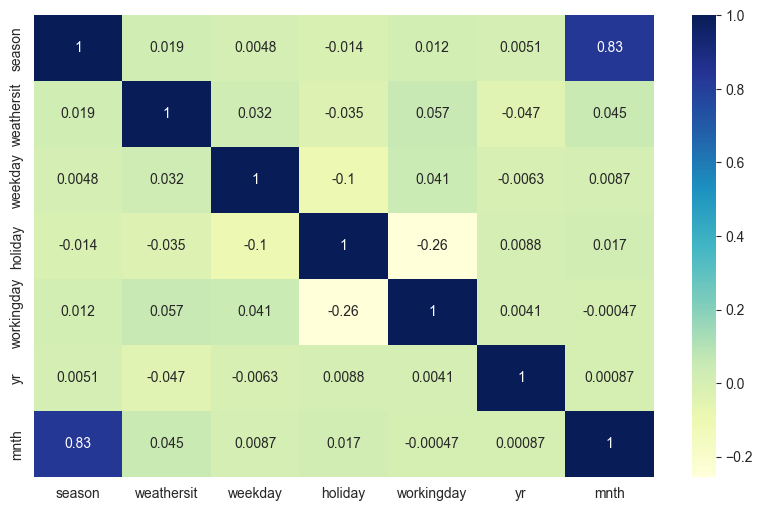

In [29]:
# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[cat_var_list].corr(), cmap='YlGnBu', annot=True)

#### 1.2.3.1 Column transformation

Some of the columns in the dataset hold the values in numerical form. We would be converting them in their respective categorical form as per the data dictionary for better representation and understanding of data.

Columns to transform: `season`, `weathersit`, `mnth`, `weekday`.

In [30]:
# chacking unique values for Categorical variables
for i in cat_var_list : 
    print('Unique values in ',i, df[i].unique())

Unique values in  season [1 2 3 4]
Unique values in  weathersit [2 1 3]
Unique values in  weekday [6 0 1 2 3 4 5]
Unique values in  holiday [0 1]
Unique values in  workingday [0 1]
Unique values in  yr [0 1]
Unique values in  mnth [ 1  2  3  4  5  6  7  8  9 10 11 12]


In [31]:
# Changing the datatype to Category

df[['season', 'weathersit', 'mnth', 'weekday']] = df[['season', 'weathersit', 'mnth', 'weekday']].astype('category')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 716 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      716 non-null    category
 1   yr          716 non-null    int64   
 2   mnth        716 non-null    category
 3   holiday     716 non-null    int64   
 4   weekday     716 non-null    category
 5   workingday  716 non-null    int64   
 6   weathersit  716 non-null    category
 7   temp        716 non-null    float64 
 8   hum         716 non-null    float64 
 9   windspeed   716 non-null    float64 
 10  cnt         716 non-null    int64   
dtypes: category(4), float64(3), int64(4)
memory usage: 48.6 KB


In [33]:
# Replacing numbers with labels 
seasons = {1 : 'spring', 2 : 'summer', 3 : 'fall', 4 : 'winter'}

mnths = {1 : 'jan', 2 : 'feb', 3 : 'mar', 4 : 'apr', 5 : 'may', 6 : 'jun', 7 : 'jul', 
               8 : 'aug', 9 : 'sep', 10 : 'oct', 11 : 'nov', 12 : 'dec'}

weekdays = {0 : 'Sunday', 1 : 'Monday', 2 : 'Tuesday', 3 : 'Wednesday', 4 : 'Thursday', 
                  5 : 'Friday', 6 : 'Saturday'}

weathersits = {1 : 'clear', 2 : 'mist/cloudy', 3 : 'light_snow/rain'}

# replacing numerals with labels 
df['season'] = df['season'].map(seasons)
df['mnth'] = df['mnth'].map(mnths)
df['weekday'] = df['weekday'].map(weekdays)
df['weathersit'] = df['weathersit'].map(weathersits)

In [34]:
# chacking unique values for Categorical variables
for i in cat_var_list : 
    print('Unique values in ',i, df[i].unique())

Unique values in  season ['spring', 'summer', 'fall', 'winter']
Categories (4, object): ['spring', 'summer', 'fall', 'winter']
Unique values in  weathersit ['mist/cloudy', 'clear', 'light_snow/rain']
Categories (3, object): ['clear', 'mist/cloudy', 'light_snow/rain']
Unique values in  weekday ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
Categories (7, object): ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
Unique values in  holiday [0 1]
Unique values in  workingday [0 1]
Unique values in  yr [0 1]
Unique values in  mnth ['jan', 'feb', 'mar', 'apr', 'may', ..., 'aug', 'sep', 'oct', 'nov', 'dec']
Length: 12
Categories (12, object): ['jan', 'feb', 'mar', 'apr', ..., 'sep', 'oct', 'nov', 'dec']


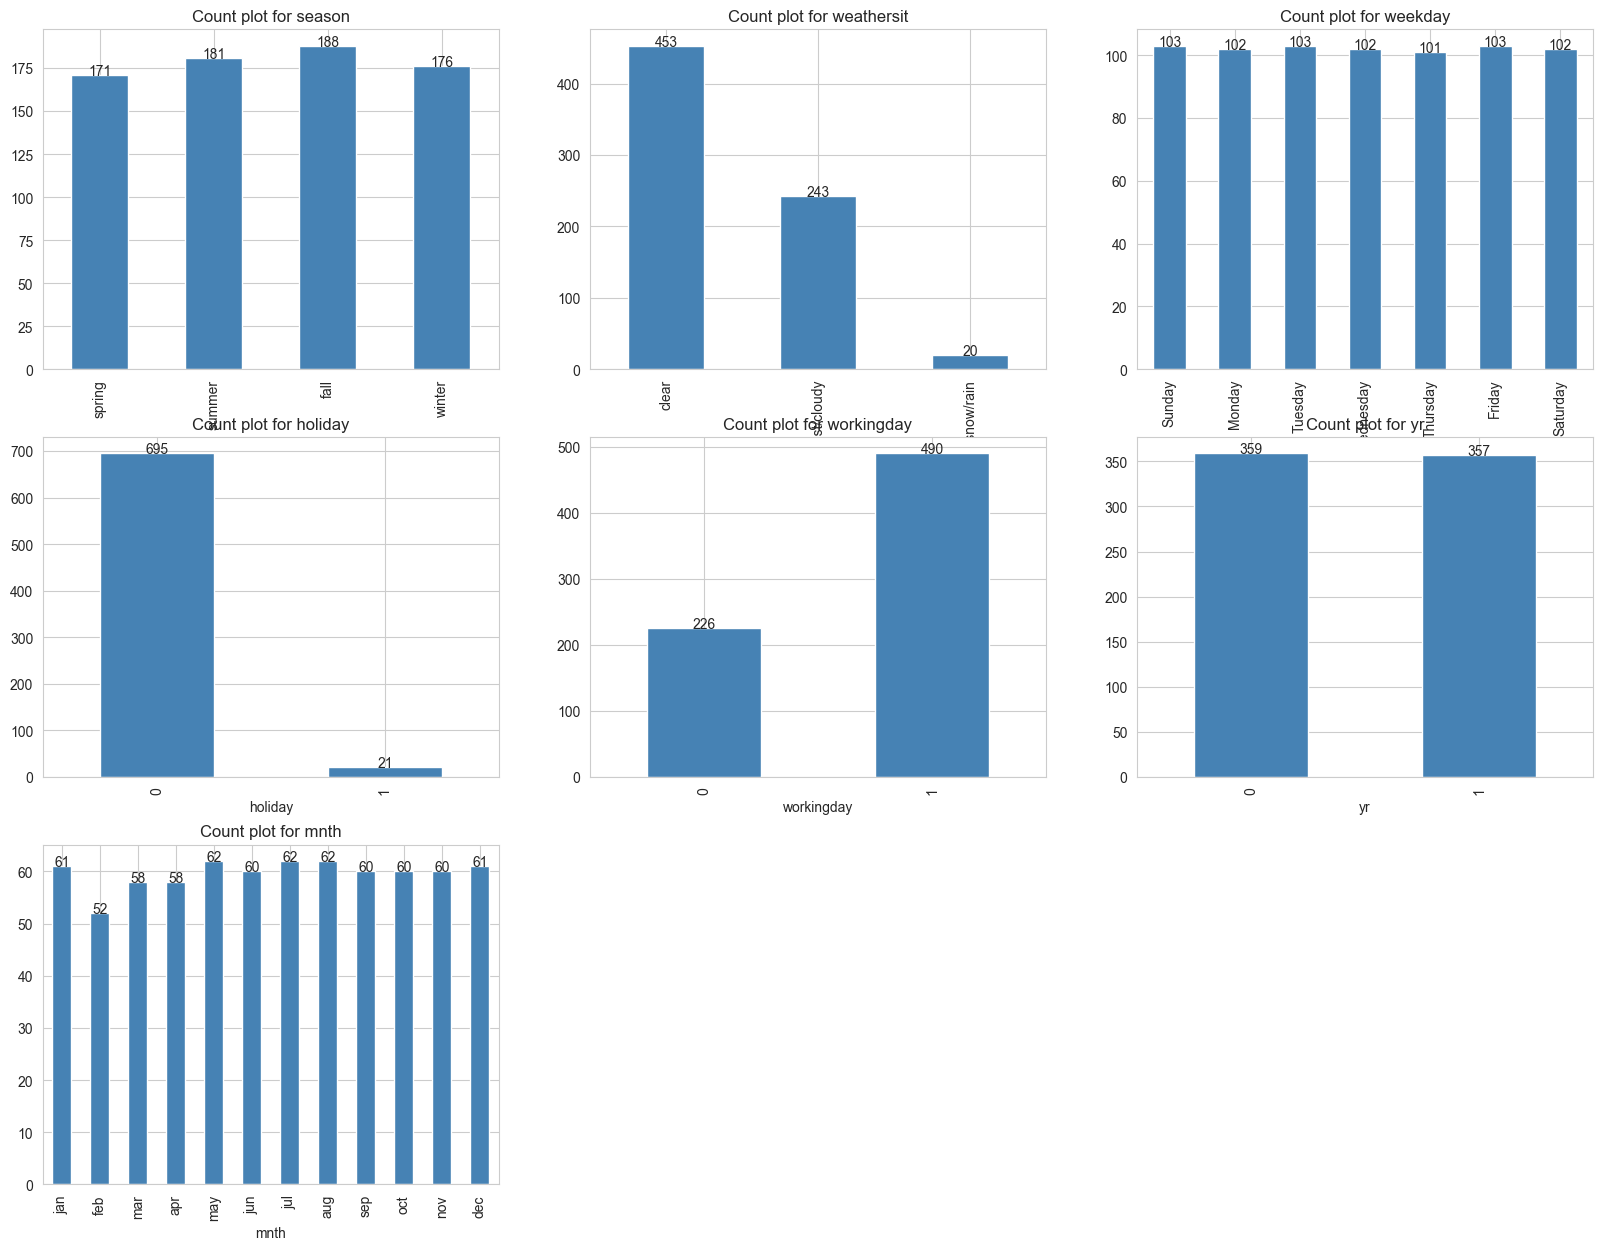

In [35]:
# Count plot for categorical variables
sns.set_style("whitegrid")
plt.figure(figsize=(20, 15))
#plt.title('Count plot for Categorical variables')
position=1
for column in cat_var_list: 
    plt.subplot(3,3,position)
    bar_plot =df.groupby([column])[column].count().plot.bar(color='steelblue')
    #ax=sns.countplot(x = column, hue = column, data = df, palette='Blues')
    
    for p in bar_plot.patches:
        height = p.get_height()
        bar_plot.text(p.get_x() + p.get_width() / 2., height, int(height), ha="center")
    
    plt.title('Count plot for '+column)
    position=position+1

plt.show()

#### 1.2.3.2 Bivariate Analysis of Categorical Variables
Column `cnt` is our primary column for analysis. So, we will do bivariate analysis of other columns with `cnt`.

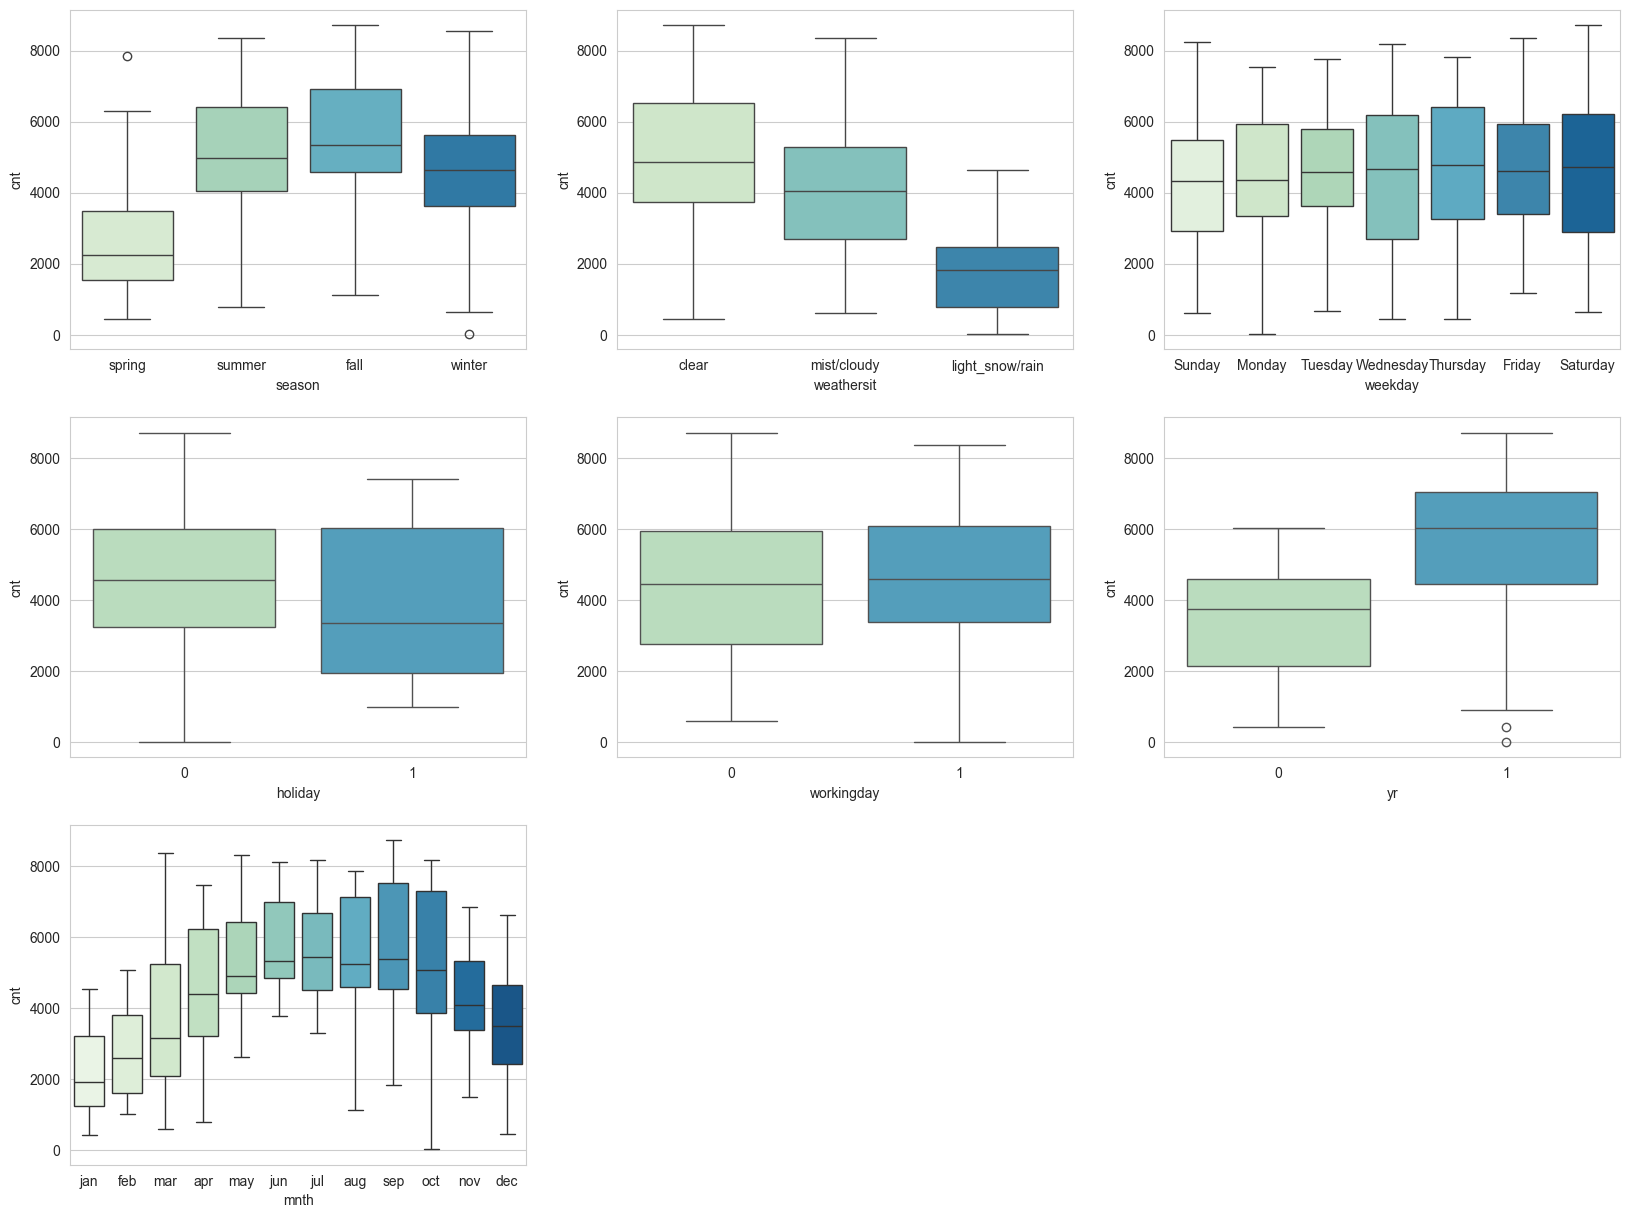

In [36]:
# Categorical Variables against cnt
sns.set_style("whitegrid")
plt.figure(figsize=(20, 15))
position=1
for column in cat_var_list: 
    plt.subplot(3,3,position)
    sns.boxplot(data=df[[column,'cnt']], x=column, y='cnt',palette='GnBu')
    position=position+1
plt.show()

#### Observations
- There are few outliers for `cnt` values observed in the dataset. For example, for spring and winter season and for year 2019.
- The bike rental is highest in the `fall`, followed by `summer`, `winter` and `spring`.
- Weather plays an important role. Bike rental is highest in clear weather and decreases as the weather worsen.
- Day of the week doesnt seem to make much of a difference.
- `Holidays` seems to have less demand
- `workingday` seems to have very less impact.
- Business have grown significantly over the year from 2018 to 2019.
- Bike rental distribution in months is similar to seasons.

#### 1.2.3.3 Outlier Analysis

In [37]:
# Dropping outliers for season = spring
df = df.drop( index = df[(df['season']=='spring') & (df['cnt']>7000)].index) 

In [38]:
# Dropping outliers for season = winter
df = df.drop( index = df[(df['season']=='winter') & (df['cnt']<100)].index) 

In [39]:
# Dropping outliers for year 2018
df = df.drop( index = df[(df['yr']==1) & (df['cnt']<500)].index) 

In [40]:
df.shape

(713, 11)

### 1.2.4 More Visualisations

##### cnt vs seasons and cnt vs mnths with weathersit as hue

<Axes: xlabel='mnth', ylabel='cnt'>

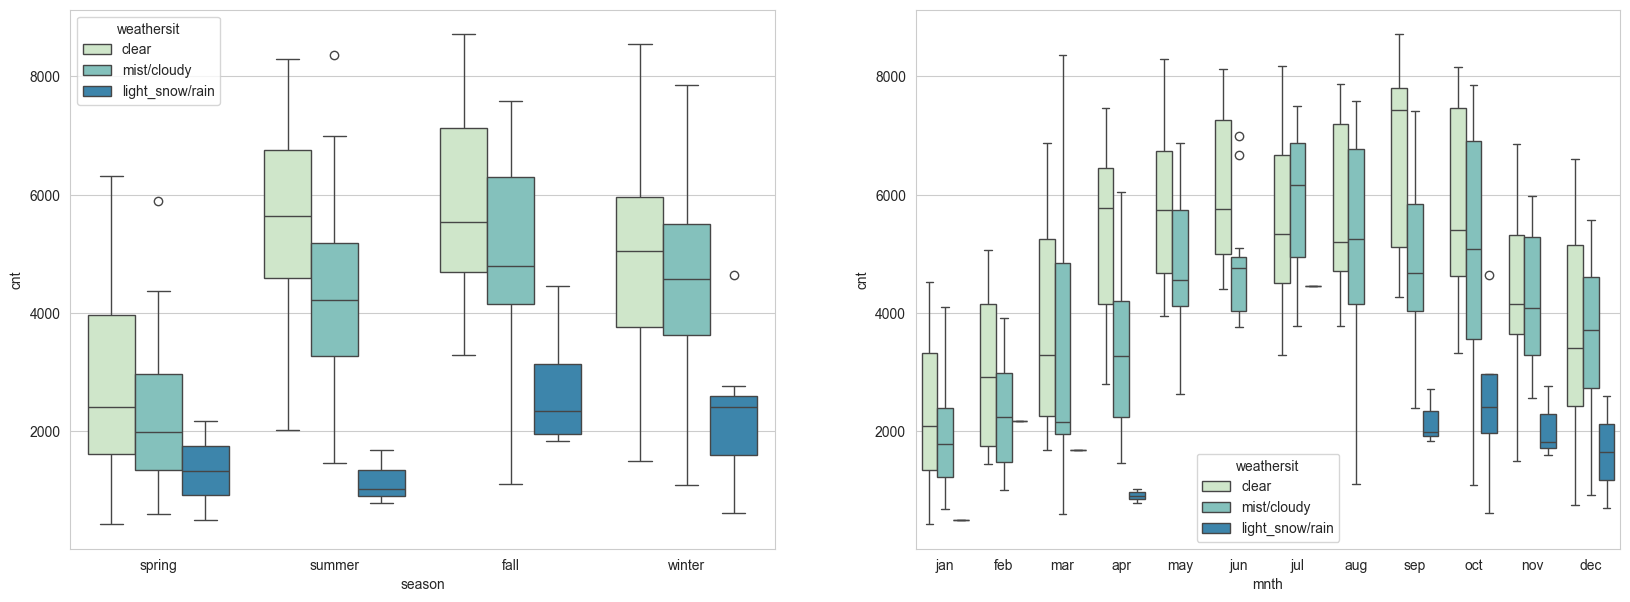

In [41]:
sns.set_style("whitegrid")
plt.figure(figsize=(20, 7))
plt.subplot(1,2,1)
sns.boxplot(data =df, x='season', y='cnt', hue ='weathersit', palette='GnBu' )
plt.subplot(1,2,2)
sns.boxplot(data =df, x='mnth', y='cnt', hue ='weathersit', palette='GnBu' )

##### temp vs seasons and temp vs mnths with weathersit as hue

<Axes: xlabel='mnth', ylabel='temp'>

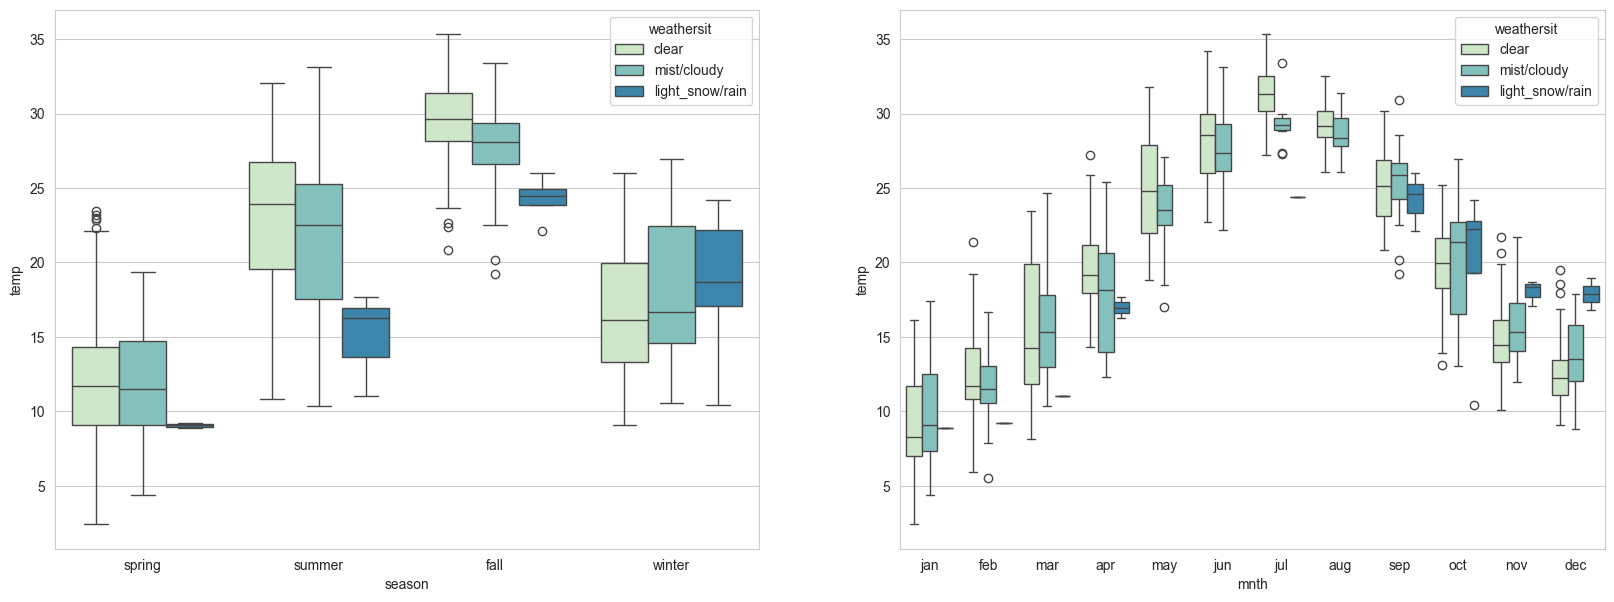

In [42]:
sns.set_style("whitegrid")
plt.figure(figsize=(20, 7))
plt.subplot(1,2,1)
sns.boxplot(data =df, x='season', y='temp', hue ='weathersit', palette='GnBu' )
plt.subplot(1,2,2)
sns.boxplot(data =df, x='mnth', y='temp', hue ='weathersit', palette='GnBu' )

##### cnt vs seasons with holiday and workingday as hue

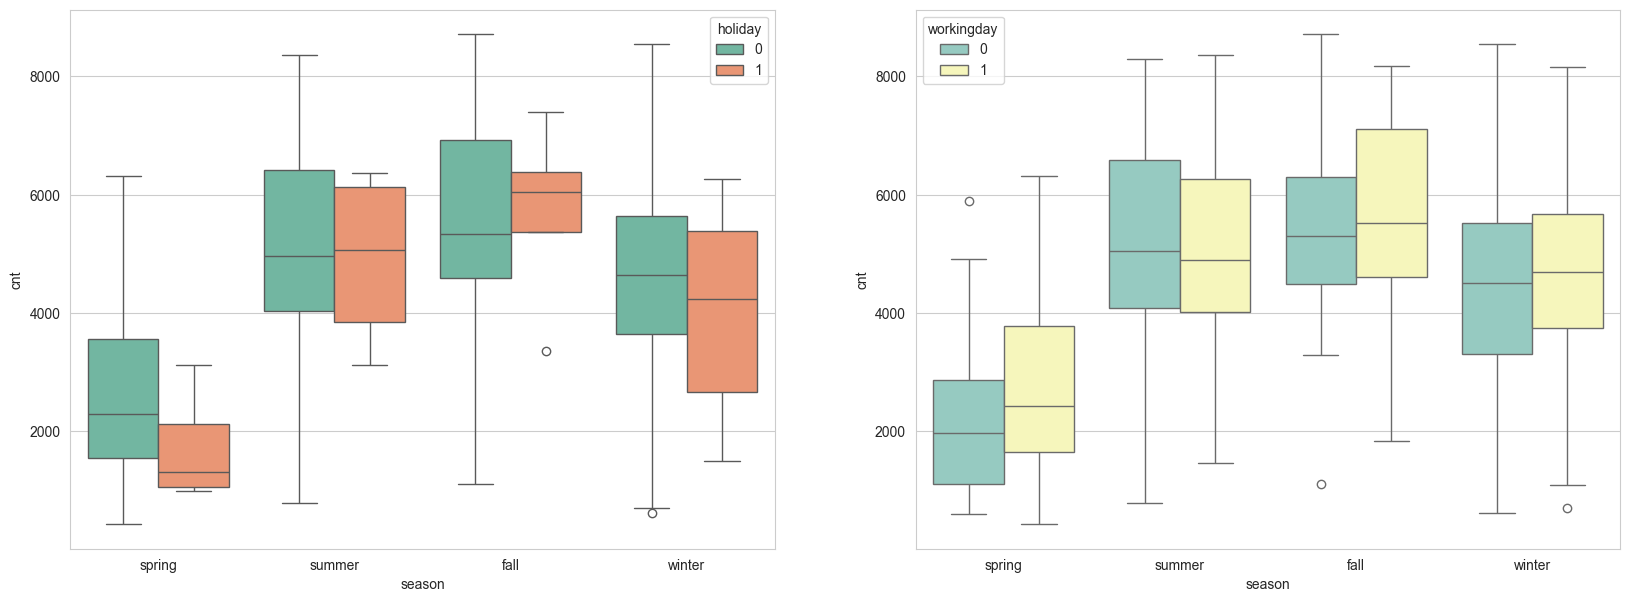

In [43]:
sns.set_style("whitegrid")
plt.figure(figsize=(20, 7))

# Distribution of cnt with season and workingday/holiday
plt.subplot(1,2,1)
sns.boxplot(data =df, x='season', y='cnt', hue ='holiday', palette='Set2' )
plt.subplot(1,2,2)
sns.boxplot(data =df, x='season', y='cnt', hue ='workingday', palette='Set3' )
plt.show()

##### Scatterplot of temp vs cnt

<Axes: xlabel='temp', ylabel='cnt'>

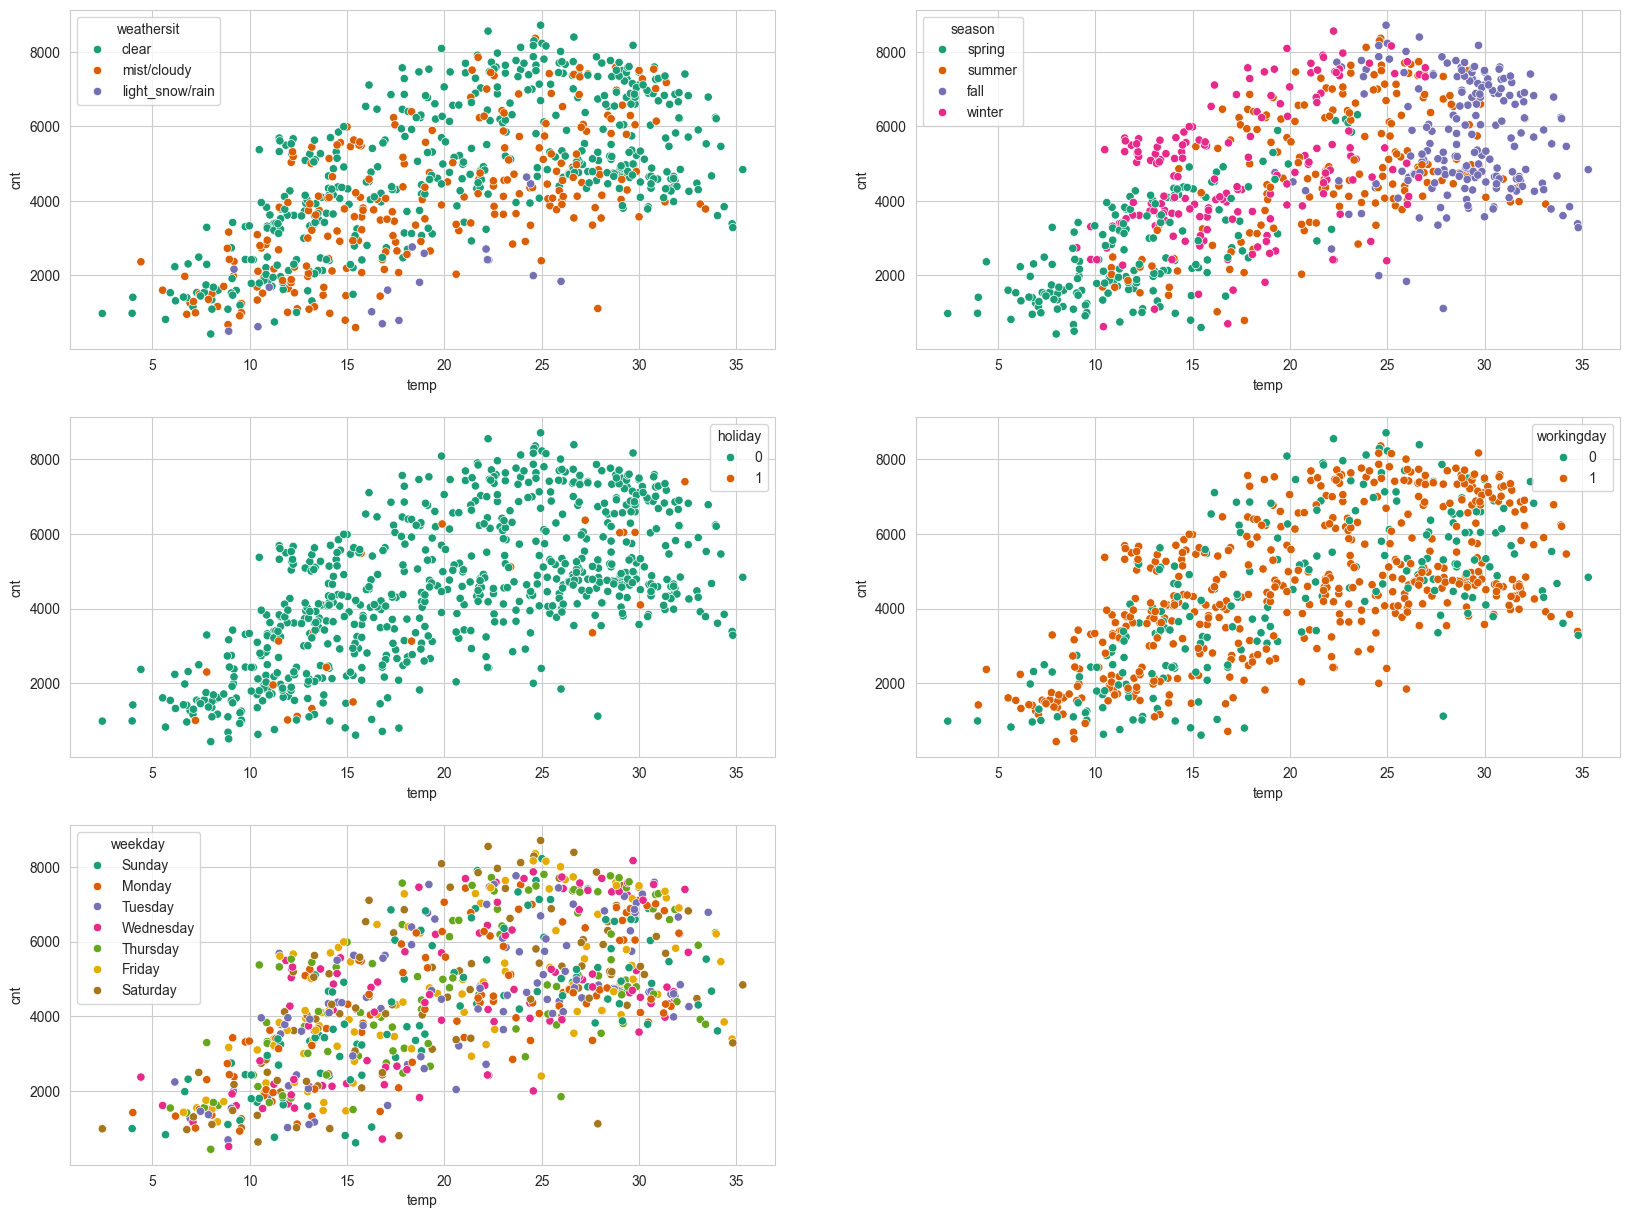

In [44]:
# Scatterplot of temp vs count
sns.set_style("whitegrid")
plt.figure(figsize=(20, 15))
plt.subplot(3,2,1)
sns.scatterplot(data =df, x='temp', y='cnt', hue ='weathersit', palette='Dark2' )
plt.subplot(3,2,2)
sns.scatterplot(data =df, x='temp', y='cnt', hue ='season', palette='Dark2' )
plt.subplot(3,2,3)
sns.scatterplot(data =df, x='temp', y='cnt', hue ='holiday', palette='Dark2' )
plt.subplot(3,2,4)
sns.scatterplot(data =df, x='temp', y='cnt', hue ='workingday', palette='Dark2' )
plt.subplot(3,2,5)
sns.scatterplot(data =df, x='temp', y='cnt', hue ='weekday', palette='Dark2' )

#### Observations
- Weather is generally clear or cloudy from January till August
- Generally there is no rain or snow in May, June, August.
- Average temperature is highest in the `fall` and lowest in the `spring`. `July` having the highest temperature.
- Average number of rental per day is also highest in the `fall` and least in the `spring`. This is displaying the high correlation between `temp` and `cnt`.
- From Scatterplot of temp vs cnt, it is showing that the highest rentals are on `clear` days, during the `fall` and on weekends especially Saturdays.


### 1.2.5 Creating Dummy Variables

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 713 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      713 non-null    category
 1   yr          713 non-null    int64   
 2   mnth        713 non-null    category
 3   holiday     713 non-null    int64   
 4   weekday     713 non-null    category
 5   workingday  713 non-null    int64   
 6   weathersit  713 non-null    category
 7   temp        713 non-null    float64 
 8   hum         713 non-null    float64 
 9   windspeed   713 non-null    float64 
 10  cnt         713 non-null    int64   
dtypes: category(4), float64(3), int64(4)
memory usage: 48.4 KB


Columns for which we will be creating dummy variables are: `season`, `mnth`, `weekday`, `weathersit`

In [46]:
# Column list for dummy variables
dummy_col_list = ['season', 'mnth', 'weekday', 'weathersit']
df[dummy_col_list] = df[dummy_col_list].astype('object')

In [47]:
# Create Dummy columns
df_dummy = pd.get_dummies(df[dummy_col_list], drop_first = True, dtype=int)
df_dummy

season_spring  season_summer  season_winter  mnth_aug  mnth_dec  \
0                1              0              0         0         0   
1                1              0              0         0         0   
2                1              0              0         0         0   
3                1              0              0         0         0   
4                1              0              0         0         0   
..             ...            ...            ...       ...       ...   
725              1              0              0         0         1   
726              1              0              0         0         1   
727              1              0              0         0         1   
728              1              0              0         0         1   
729              1              0              0         0         1   

     mnth_feb  mnth_jan  mnth_jul  mnth_jun  mnth_mar  ...  mnth_oct  \
0           0         1         0         0         0  ...         0   
1           0         1         0         0         0  ...         0   
2           0         1         0         0         0  ...         0   
3           0         1         0         0         0  ...         0   
4           0         1         0         0         0  ...         0   
..        ...       ...       ...       ...       ...  ...       ...   
725         0         0         0         0         0  ...         0   
726         0         0         0         0         0  ...         0   
727         0         0         0         0         0  ...         0   
728         0         0         0         0         0  ...         0   
729         0         0         0         0         0  ...         0   

     mnth_sep  weekday_Monday  weekday_Saturday  weekday_Sunday  \
0           0               0                 1               0   
1           0               0                 0               1   
2           0               1                 0               0   
3           0               0                 0               0   
4           0               0                 0               0   
..        ...             ...               ...             ...   
725         0               0                 0               0   
726         0               0                 0               0   
727         0               0                 1               0   
728         0               0                 0               1   
729         0               1                 0               0   

     weekday_Thursday  weekday_Tuesday  weekday_Wednesday  \
0                   0                0                  0   
1                   0                0                  0   
2                   0                0                  0   
3                   0                1                  0   
4                   0                0                  1   
..                ...              ...                ...   
725                 1                0                  0   
726                 0                0                  0   
727                 0                0                  0   
728                 0                0                  0   
729                 0                0                  0   

     weathersit_light_snow/rain  weathersit_mist/cloudy  
0                             0                       1  
1                             0                       1  
2                             0                       0  
3                             0                       0  
4                             0                       0  
..                          ...                     ...  
725                           0                       1  
726                           0                       1  
727                           0                       1  
728                           0                       0  
729                           0                       1  

[713 rows x 22 columns]

In [48]:
df_dummy.columns

Index(['season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weathersit_light_snow/rain',
       'weathersit_mist/cloudy'],
      dtype='object')

In [49]:
# Concat dummy columns in the original dataset
df = pd.concat([df, df_dummy], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 713 entries, 0 to 729
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   season                      713 non-null    object 
 1   yr                          713 non-null    int64  
 2   mnth                        713 non-null    object 
 3   holiday                     713 non-null    int64  
 4   weekday                     713 non-null    object 
 5   workingday                  713 non-null    int64  
 6   weathersit                  713 non-null    object 
 7   temp                        713 non-null    float64
 8   hum                         713 non-null    float64
 9   windspeed                   713 non-null    float64
 10  cnt                         713 non-null    int64  
 11  season_spring               713 non-null    int64  
 12  season_summer               713 non-null    int64  
 13  season_winter               713 non-null

In [50]:
# drop the original columns
df = df.drop(dummy_col_list, axis = 1)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 713 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          713 non-null    int64  
 1   holiday                     713 non-null    int64  
 2   workingday                  713 non-null    int64  
 3   temp                        713 non-null    float64
 4   hum                         713 non-null    float64
 5   windspeed                   713 non-null    float64
 6   cnt                         713 non-null    int64  
 7   season_spring               713 non-null    int64  
 8   season_summer               713 non-null    int64  
 9   season_winter               713 non-null    int64  
 10  mnth_aug                    713 non-null    int64  
 11  mnth_dec                    713 non-null    int64  
 12  mnth_feb                    713 non-null    int64  
 13  mnth_jan                    713 non-null

<Axes: >

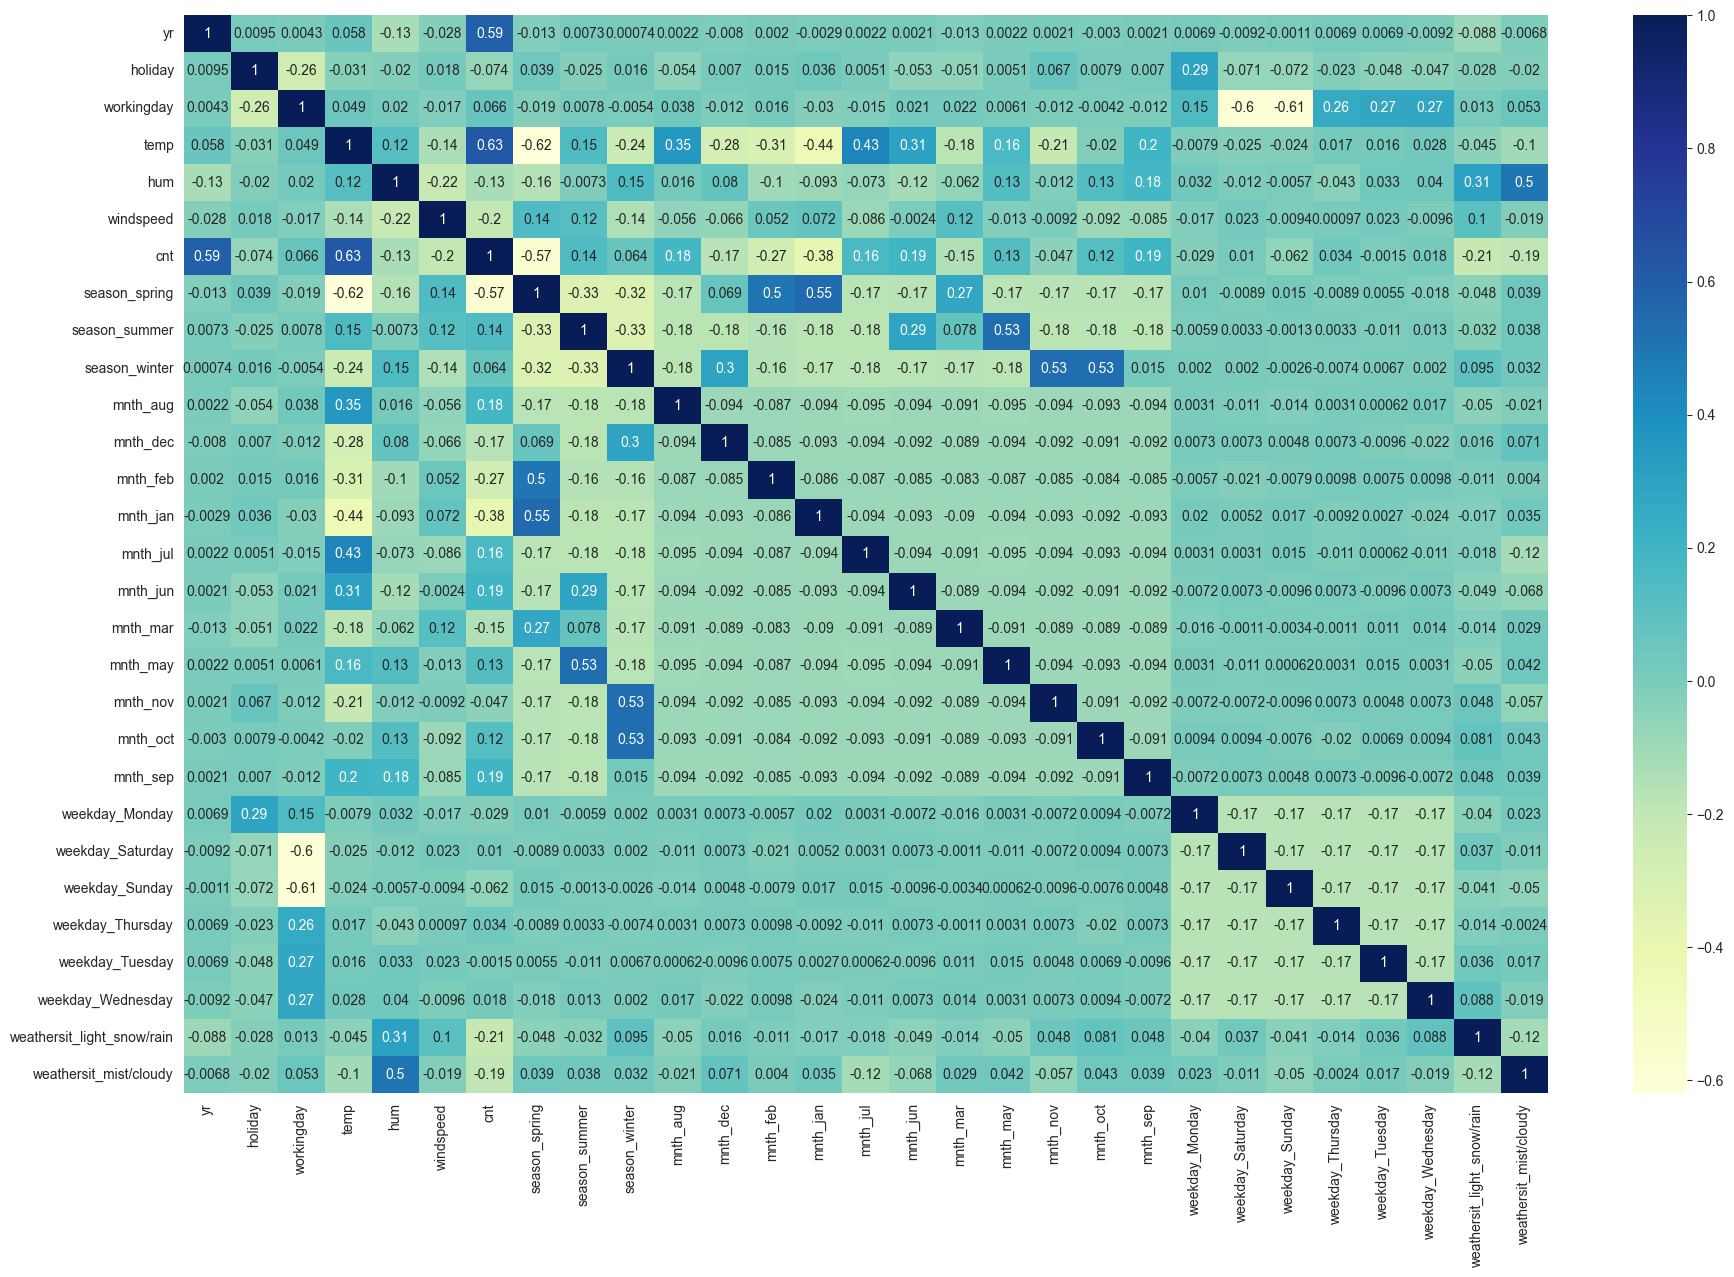

In [52]:
# Heatmap
plt.figure(figsize=(22, 14))
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True)

# 2. Model Building

In this module we will start with splitting the data into test and training sets. Then we will proceed with scaling. Finally we will do the model building and also tuning the variables to get a better model.

## 2.1 Splitting the Data into Training and Testing Sets
We will split the data into train and test sets in 70:30 ratio.

In [53]:
# import the relevant library
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
# Split the data into train and test sets in 70:30 ratio
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [54]:
# check the shape of training and test sets
print(df.shape)
print(df_train.shape)
print(df_test.shape)

(713, 29)
(499, 29)
(214, 29)


In [55]:
df_train.head()

yr  holiday  workingday       temp      hum  windspeed   cnt  \
422   1        0           1  15.033347  49.0833  17.958211  4322   
728   1        0           0  10.489153  48.3333  23.500518  1796   
480   1        0           1  20.431653  75.6667  11.833875  5026   
116   0        0           1  25.420000  83.5417  20.917400  3872   
581   1        0           0  31.535847  65.2500  19.458207  5464   

     season_spring  season_summer  season_winter  ...  mnth_oct  mnth_sep  \
422              1              0              0  ...         0         0   
728              1              0              0  ...         0         0   
480              0              1              0  ...         0         0   
116              0              1              0  ...         0         0   
581              0              0              0  ...         0         0   

     weekday_Monday  weekday_Saturday  weekday_Sunday  weekday_Thursday  \
422               1                 0               0                 0   
728               0                 0               1                 0   
480               0                 0               0                 1   
116               0                 0               0                 0   
581               0                 0               1                 0   

     weekday_Tuesday  weekday_Wednesday  weathersit_light_snow/rain  \
422                0                  0                           0   
728                0                  0                           0   
480                0                  0                           0   
116                0                  1                           0   
581                0                  0                           0   

     weathersit_mist/cloudy  
422                       0  
728                       0  
480                       1  
116                       1  
581                       0  

[5 rows x 29 columns]

In [56]:
df_test.head()

yr  holiday  workingday       temp      hum  windspeed   cnt  \
585   1        0           1  30.989153  62.0417  10.458700  7286   
592   1        0           1  29.485847  51.9167   9.500332  7605   
293   0        0           1  17.527500  57.4167  14.833532  4304   
157   0        0           1  29.007500  59.7917  12.583136  4833   
453   1        0           1  15.170000  58.0833   9.250489  5459   

     season_spring  season_summer  season_winter  ...  mnth_oct  mnth_sep  \
585              0              0              0  ...         0         0   
592              0              0              0  ...         0         0   
293              0              0              1  ...         1         0   
157              0              1              0  ...         0         0   
453              0              1              0  ...         0         0   

     weekday_Monday  weekday_Saturday  weekday_Sunday  weekday_Thursday  \
585               0                 0               0                 1   
592               0                 0               0                 1   
293               0                 0               0                 0   
157               0                 0               0                 0   
453               0                 0               0                 0   

     weekday_Tuesday  weekday_Wednesday  weathersit_light_snow/rain  \
585                0                  0                           0   
592                0                  0                           0   
293                0                  0                           0   
157                1                  0                           0   
453                0                  0                           0   

     weathersit_mist/cloudy  
585                       0  
592                       0  
293                       0  
157                       0  
453                       1  

[5 rows x 29 columns]

## 2.2 Rescaling Training Data

In this section we would be rescaling ans seperating the X and y sets in the train dataset.
For scaling we would be using MinMax Scaler.

In [57]:
# Import the required library
from sklearn.preprocessing import MinMaxScaler

In [58]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

In [59]:
# Scale the numnerical variables
scaler = MinMaxScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  499.000000  499.000000  499.000000  499.000000  499.000000  499.000000   
mean     0.511022    0.034068    0.701403    0.558378    0.512414    0.457516   
std      0.500380    0.181586    0.458102    0.234707    0.204516    0.204729   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.348693    0.360286    0.312040   
50%      1.000000    0.000000    1.000000    0.569004    0.515490    0.430082   
75%      1.000000    0.000000    1.000000    0.767391    0.661239    0.585673   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              cnt  season_spring  season_summer  season_winter  ...  \
count  499.000000     499.000000     499.000000     499.000000  ...   
mean     0.496932       0.232465       0.242485       0.256513  ...   
std      0.231030       0.422828       0.429016       0.437146  ...   
min      0.000000       0.000000       0.000000       0.000000  ...   
25%      0.341603       0.000000       0.000000       0.000000  ...   
50%      0.501509       0.000000       0.000000       0.000000  ...   
75%      0.677412       0.000000       0.000000       1.000000  ...   
max      1.000000       1.000000       1.000000       1.000000  ...   

         mnth_oct    mnth_sep  weekday_Monday  weekday_Saturday  \
count  499.000000  499.000000      499.000000        499.000000   
mean     0.080160    0.090180        0.146293          0.116232   
std      0.271814    0.286727        0.353754          0.320825   
min      0.000000    0.000000        0.000000          0.000000   
25%      0.000000    0.000000        0.000000          0.000000   
50%      0.000000    0.000000        0.000000          0.000000   
75%      0.000000    0.000000        0.000000          0.000000   
max      1.000000    1.000000        1.000000          1.000000   

       weekday_Sunday  weekday_Thursday  weekday_Tuesday  weekday_Wednesday  \
count      499.000000        499.000000       499.000000         499.000000   
mean         0.148297          0.148297         0.150301           0.132265   
std          0.355750          0.355750         0.357724           0.339118   
min          0.000000          0.000000         0.000000           0.000000   
25%          0.000000          0.000000         0.000000           0.000000   
50%          0.000000          0.000000         0.000000           0.000000   
75%          0.000000          0.000000         0.000000           0.000000   
max          1.000000          1.000000         1.000000           1.000000   

       weathersit_light_snow/rain  weathersit_mist/cloudy  
count                  499.000000              499.000000  
mean                     0.026052                0.356713  
std                      0.159450                0.479510  
min                      0.000000                0.000000  
25%                      0.000000                0.000000  
50%                      0.000000                0.000000  
75%                      0.000000                1.000000  
max                      1.000000                1.000000  

[8 rows x 29 columns]

##### X_train, y_train

In [60]:
y_train = df_train.pop('cnt')
X_train = df_train

In [61]:
X_train.head()

yr  holiday  workingday      temp       hum  windspeed  season_spring  \
422   1        0           1  0.394681  0.298636   0.690554              1   
728   1        0           0  0.252441  0.287484   0.923102              1   
480   1        0           1  0.563656  0.693929   0.433585              0   
116   0        0           1  0.719799  0.811029   0.814718              0   
581   1        0           0  0.911235  0.539033   0.753492              0   

     season_summer  season_winter  mnth_aug  ...  mnth_oct  mnth_sep  \
422              0              0         0  ...         0         0   
728              0              0         0  ...         0         0   
480              1              0         0  ...         0         0   
116              1              0         0  ...         0         0   
581              0              0         1  ...         0         0   

     weekday_Monday  weekday_Saturday  weekday_Sunday  weekday_Thursday  \
422               1                 0               0                 0   
728               0                 0               1                 0   
480               0                 0               0                 1   
116               0                 0               0                 0   
581               0                 0               1                 0   

     weekday_Tuesday  weekday_Wednesday  weathersit_light_snow/rain  \
422                0                  0                           0   
728                0                  0                           0   
480                0                  0                           0   
116                0                  1                           0   
581                0                  0                           0   

     weathersit_mist/cloudy  
422                       0  
728                       0  
480                       1  
116                       1  
581                       0  

[5 rows x 28 columns]

In [62]:
y_train.head()

422    0.469757
728    0.164795
480    0.554751
116    0.415429
581    0.607630
Name: cnt, dtype: float64

## 2.3 Building the Model

We will be choosing 20 columns using RFE. Then we would use p-value and VIF method for further elemination.

### 2.3.1 RFE

In [63]:
# Inporting the required packages

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [64]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=20)  # running RFE
rfe = rfe.fit(X_train, y_train)

In [65]:
# Listing the columns with rfe ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', np.True_, np.int64(1)),
 ('holiday', np.True_, np.int64(1)),
 ('workingday', np.True_, np.int64(1)),
 ('temp', np.True_, np.int64(1)),
 ('hum', np.True_, np.int64(1)),
 ('windspeed', np.True_, np.int64(1)),
 ('season_spring', np.True_, np.int64(1)),
 ('season_summer', np.True_, np.int64(1)),
 ('season_winter', np.True_, np.int64(1)),
 ('mnth_aug', np.True_, np.int64(1)),
 ('mnth_dec', np.True_, np.int64(1)),
 ('mnth_feb', np.True_, np.int64(1)),
 ('mnth_jan', np.True_, np.int64(1)),
 ('mnth_jul', np.False_, np.int64(8)),
 ('mnth_jun', np.False_, np.int64(7)),
 ('mnth_mar', np.True_, np.int64(1)),
 ('mnth_may', np.True_, np.int64(1)),
 ('mnth_nov', np.True_, np.int64(1)),
 ('mnth_oct', np.False_, np.int64(4)),
 ('mnth_sep', np.True_, np.int64(1)),
 ('weekday_Monday', np.False_, np.int64(5)),
 ('weekday_Saturday', np.True_, np.int64(1)),
 ('weekday_Sunday', np.False_, np.int64(2)),
 ('weekday_Thursday', np.False_, np.int64(6)),
 ('weekday_Tuesday', np.False_, np.int64(3)),
 ('wee

In [66]:
# Extracting the significant columns as per rfe

col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_mar', 'mnth_may', 'mnth_nov',
       'mnth_sep', 'weekday_Saturday', 'weathersit_light_snow/rain',
       'weathersit_mist/cloudy'],
      dtype='object')

In [67]:
# insignificant column list

X_train.columns[~rfe.support_]

Index(['mnth_jul', 'mnth_jun', 'mnth_oct', 'weekday_Monday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

In [68]:
# List of columns getting dropped from the dataset

lm_cols_dropped = list(X_train.columns[~rfe.support_])

### 2.3.2 Building model using statsmodel, for the detailed statistics

We would be using statsmodels for creating the linear regression model and we will also be doing VIF analysis. 

Variance Inflation Factor (VIF) explains how well a predictor variable is correlated with all the other variables, excluding the target variable.

In [69]:
# importing required packages
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [70]:
# Function for creating LR Model and VIF values

def create_model(X_train_lm):
    # Adding a constant variable 
    X_train_lm = sm.add_constant(X_train_lm)
    # create the model
    lm = sm.OLS(y_train,X_train_lm).fit()
    
    # VIF analysis
    # Drop the constant
    X_train_vif = X_train_lm.drop(['const'], axis=1)
    # Calculate the VIFs for the new model
    vif = pd.DataFrame()
    X = X_train_vif
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return X_train_lm, lm, vif

#### Model 1

In this section we will create the first Linear Regression model for this problem using the columns given by RFE analysis above.

In [71]:
# Creating X_test dataframe with RFE selected variables
X_train_lm = X_train[col]

In [72]:
# Create the model and VIF analysis
X_train_lm, lm, vif = create_model(X_train_lm)
print(lm.summary())
print()
print("------------------- VIF results -------------------")
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     147.7
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          5.07e-190
Time:                        11:40:46   Log-Likelihood:                 515.49
No. Observations:                 499   AIC:                            -989.0
Df Residuals:                     478   BIC:                            -900.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

##### Observations
- The R-squared and Adjusted R-squared value is > .85 which is good.
- But many of the parameters have high P-vaue and VIF value.

#### Model 2

Looking at the p-values, `mnth_mar` has the highest p-value. So, in this model we will remove `mnth_mar` from X_train_lm and analyse the result.

In [73]:
# Column to drop in this model

col_to_drop = 'mnth_mar'

In [74]:
# Dropping the required from the X_train_lm
X_train_lm = X_train_lm.drop([col_to_drop], axis=1)
lm_cols_dropped.append(col_to_drop)

# Create the model and VIF analysis
X_train_lm, lm, vif = create_model(X_train_lm)
print(lm.summary())
print()
print("------------------- VIF results -------------------")
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     155.5
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          6.65e-191
Time:                        11:40:46   Log-Likelihood:                 514.96
No. Observations:                 499   AIC:                            -989.9
Df Residuals:                     479   BIC:                            -905.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

##### Observations
- The R-squared and Adjusted R-squared value is > .85.
- But many of the parameters still have high P-vaue and VIF value.

#### Model 3

Now, we will remove the parameter with the highest p-value now which is `holiday`.

In [75]:
# Column to drop in this model

col_to_drop = 'holiday'

In [76]:
# Dropping the required from the X_train_lm
X_train_lm = X_train_lm.drop([col_to_drop], axis=1)
lm_cols_dropped.append(col_to_drop)

# Create the model and VIF analysis
X_train_lm, lm, vif = create_model(X_train_lm)
print(lm.summary())
print()
print("------------------- VIF results -------------------")
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     163.7
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          1.23e-191
Time:                        11:40:47   Log-Likelihood:                 514.04
No. Observations:                 499   AIC:                            -990.1
Df Residuals:                     480   BIC:                            -910.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

##### Observations
- The R-squared and Adjusted R-squared value is > .85 which is good.
- But many of the parameters still have high P-vaue and VIF value.

#### Model 4

Now, we will remove the parameter with the highest p-value now which is `season_summer`.

In [77]:
# Column to drop in this model

col_to_drop = 'season_summer'

In [78]:
# Dropping the required from the X_train_lm
X_train_lm = X_train_lm.drop([col_to_drop], axis=1)
lm_cols_dropped.append(col_to_drop)

# Create the model and VIF analysis
X_train_lm, lm, vif = create_model(X_train_lm)
print(lm.summary())
print()
print("------------------- VIF results -------------------")
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     172.6
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          3.44e-192
Time:                        11:40:47   Log-Likelihood:                 512.66
No. Observations:                 499   AIC:                            -989.3
Df Residuals:                     481   BIC:                            -913.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

##### Observations
- The R-squared and Adjusted R-squared value is > .85.
- But many of the parameters still have high P-vaue and VIF value.

#### Model 5

Now, we will remove the parameter with the highest p-value now which is `mnth_aug`.

In [79]:
# Column to drop in this model

col_to_drop = 'mnth_aug'

In [80]:
# Dropping the required from the X_train_lm
X_train_lm = X_train_lm.drop([col_to_drop], axis=1)
lm_cols_dropped.append(col_to_drop)

# Create the model and VIF analysis
X_train_lm, lm, vif = create_model(X_train_lm)
print(lm.summary())
print()
print("------------------- VIF results -------------------")
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     183.2
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          4.94e-193
Time:                        11:40:47   Log-Likelihood:                 511.95
No. Observations:                 499   AIC:                            -989.9
Df Residuals:                     482   BIC:                            -918.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

##### Observations
- The R-squared and Adjusted R-squared value is > .85 which is good.
- The P-values are now under 0.05
- There are few parameters with high VIF(>5)

#### Model 6

Now, we will remove the parameter with the highest VIF i.e. `hum`.

In [81]:
# Column to drop in this model

#col_to_drop = 'hum'

In [82]:
# Dropping the required from the X_train_lm
#X_train_lm = X_train_lm.drop([col_to_drop], axis=1)
#lm_cols_dropped.append(col_to_drop)

# Create the model and VIF analysis
X_train_lm, lm, vif = create_model(X_train_lm)
print(lm.summary())
print()
print("------------------- VIF results -------------------")
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     183.2
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          4.94e-193
Time:                        11:40:47   Log-Likelihood:                 511.95
No. Observations:                 499   AIC:                            -989.9
Df Residuals:                     482   BIC:                            -918.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

##### Observations
- The R-squared and Adjusted R-squared value is > .84.
- But many of the parameters still have high P-vaue and VIF value.

#### Model 7

Now, we will remove the parameter with the highest p-value now which is `mnth_feb`.

In [83]:
# Column to drop in this model

col_to_drop = 'mnth_feb'

In [84]:
# Dropping the required from the X_train_lm
X_train_lm = X_train_lm.drop([col_to_drop], axis=1)
lm_cols_dropped.append(col_to_drop)

# Create the model and VIF analysis
X_train_lm, lm, vif = create_model(X_train_lm)
print(lm.summary())
print()
print("------------------- VIF results -------------------")
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     193.9
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          2.67e-193
Time:                        11:40:47   Log-Likelihood:                 509.83
No. Observations:                 499   AIC:                            -987.7
Df Residuals:                     483   BIC:                            -920.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

##### Observations
- The R-squared and Adjusted R-squared value is > .84 which is good.
- The P-values are now under 0.05
- There are few parameters with high VIF(>5)

#### Model 8

In this model, we will remove `windspeed` which has a high VIF.

In [85]:
# Column to drop in this model

col_to_drop = 'windspeed'

In [86]:
# Dropping the required from the X_train_lm
X_train_lm = X_train_lm.drop([col_to_drop], axis=1)
lm_cols_dropped.append(col_to_drop)

# Create the model and VIF analysis
X_train_lm, lm, vif = create_model(X_train_lm)
print(lm.summary())
print()
print("------------------- VIF results -------------------")
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     193.4
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          6.55e-188
Time:                        11:40:47   Log-Likelihood:                 494.20
No. Observations:                 499   AIC:                            -958.4
Df Residuals:                     484   BIC:                            -895.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

##### Observations
- The R-squared and Adjusted R-squared value is > .84 which is good.
- The P-values are now under 0.05
- All the VIF values are under 5

Lets see if we can decrease the p-values and VIF's further with affecting R-squared adversely.

#### Model 9

Now, we will try removing the `workingday` and analyse the result.

In [87]:
# Column to drop in this model
col_to_drop = 'workingday'

# Dropping the required from the X_train_lm
X_train_lm = X_train_lm.drop([col_to_drop], axis=1)
lm_cols_dropped.append(col_to_drop)

# Create the model and VIF analysis
X_train_lm, lm, vif = create_model(X_train_lm)
print(lm.summary())
print()
print("------------------- VIF results -------------------")
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     195.6
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          2.56e-183
Time:                        11:40:47   Log-Likelihood:                 480.50
No. Observations:                 499   AIC:                            -933.0
Df Residuals:                     485   BIC:                            -874.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

##### Observations
- The R-squared and Adjusted R-squared value is > .83 which is good.
- The P-values are now under 0.05
- All the VIF values are under 5
- some of the p-values increased a bit.

Lets see if we can decrease the p-values and VIF's further with affecting R-squared adversely.

#### Model 10

Now, we will remove `mnth_may`, which has the highest p-value.

In [88]:
# Column to drop in this model
col_to_drop = 'mnth_may'

# Dropping the required from the X_train_lm
X_train_lm = X_train_lm.drop([col_to_drop], axis=1)
lm_cols_dropped.append(col_to_drop)

# Create the model and VIF analysis
X_train_lm, lm, vif = create_model(X_train_lm)
print(lm.summary())
print()
print("------------------- VIF results -------------------")
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     208.0
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          1.13e-182
Time:                        11:40:47   Log-Likelihood:                 476.18
No. Observations:                 499   AIC:                            -926.4
Df Residuals:                     486   BIC:                            -871.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

##### Observations
- The R-squared and Adjusted R-squared value is > .83 which is good.
- The P-values are now under 0.05
- All the VIF values are under 5
- the VIF values decreased further.

Lets see if we can decrease the p-values and VIF's further with affecting R-squared adversely.

#### Model 11

Now, we will mremove `weekday_Saturday`, which has the highest p-value.

In [89]:
# Column to drop in this model
col_to_drop = 'weekday_Saturday'

# Dropping the required from the X_train_lm
X_train_lm = X_train_lm.drop([col_to_drop], axis=1)
lm_cols_dropped.append(col_to_drop)

# Create the model and VIF analysis
X_train_lm, lm, vif = create_model(X_train_lm)
print(lm.summary())
print()
print("------------------- VIF results -------------------")
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     224.3
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          1.11e-182
Time:                        11:40:47   Log-Likelihood:                 473.38
No. Observations:                 499   AIC:                            -922.8
Df Residuals:                     487   BIC:                            -872.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

##### Observations
- The R-squared and Adjusted R-squared value is > .82 which is good.
- The P-values are now under 0.05
- All the VIF values are under 5
- the VIF value of `temp` decreased further.

Lets see if we can decrease the p-values and VIF's further with affecting R-squared adversely.

#### Model 12

Now, we will mremove `mnth_jan`, which has the highest p-value.

In [90]:
# Column to drop in this model
col_to_drop = 'mnth_jan'

# Dropping the required from the X_train_lm
X_train_lm = X_train_lm.drop([col_to_drop], axis=1)
lm_cols_dropped.append(col_to_drop)

# Create the model and VIF analysis
X_train_lm, lm, vif = create_model(X_train_lm)
print(lm.summary())
print()
print("------------------- VIF results -------------------")
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     244.4
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          6.94e-183
Time:                        11:40:47   Log-Likelihood:                 471.02
No. Observations:                 499   AIC:                            -920.0
Df Residuals:                     488   BIC:                            -873.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

##### Observations
- The R-squared and Adjusted R-squared value is > .82 which is good.
- The P-values are now under 0.005
- All the VIF values are under 3

##### We will treat this Model 12 as our final model.

# 3. Model Evaluation

### 3.1 Model Performance on Train Data

In this section, we will compare the predicted value using the model and Actual value on train dataset.

In [91]:
print(f'R-squared on train data: {lm.rsquared:.4f}')
print(f'Adjusted R-squared on train data: {lm.rsquared_adj:.4f}')

R-squared on train data: 0.8336
Adjusted R-squared on train data: 0.8302


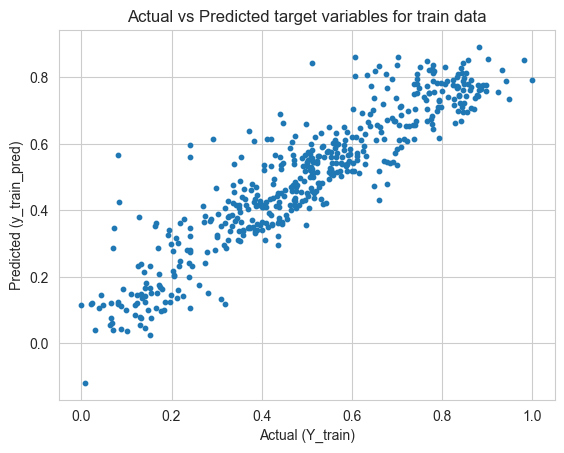

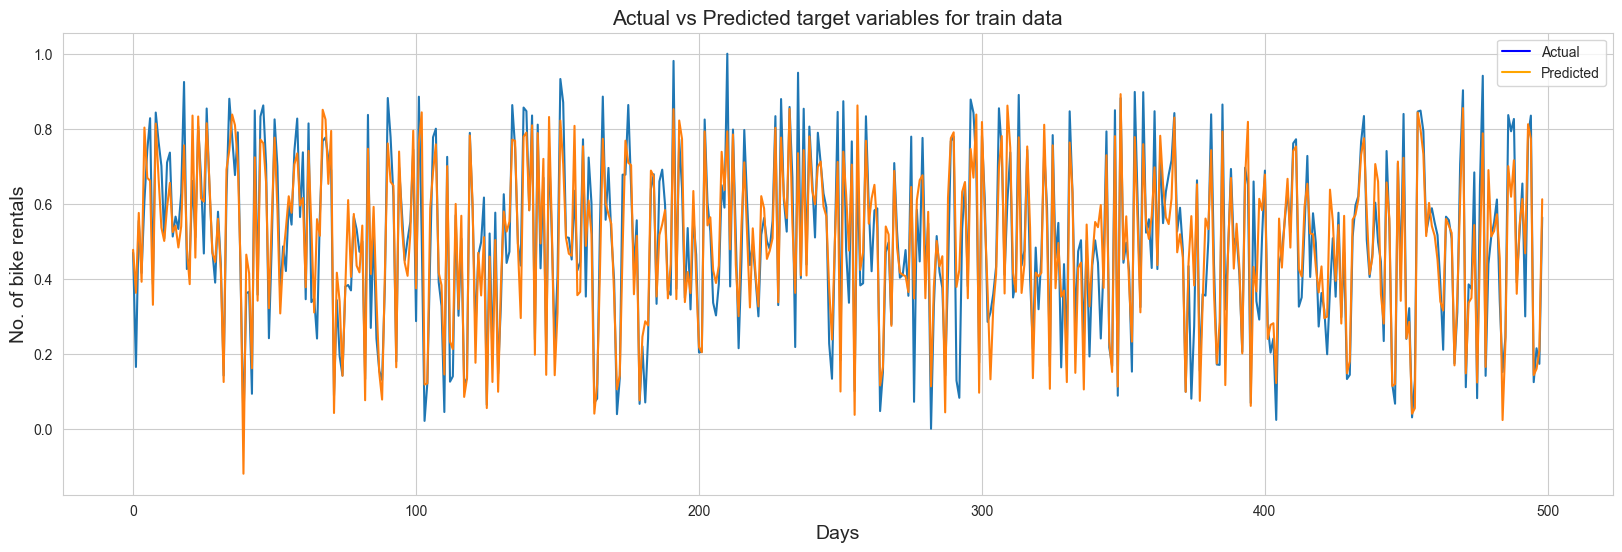

In [92]:
# Predict the target values based on the model
y_train_pred = lm.predict(X_train_lm)

plt.scatter(y_train, y_train_pred, s=10)
plt.title('Actual vs Predicted target variables for train data', fontsize = 12)            # Plot heading 
plt.xlabel('Actual (Y_train)', fontsize = 10)
plt.ylabel('Predicted (y_train_pred)', fontsize = 10)

from matplotlib.lines import Line2D

plt.figure(figsize=(20, 6))
plt.plot(range(len(y_train)),y_train)
plt.plot(range(len(y_train_pred)),y_train_pred)
plt.title('Actual vs Predicted target variables for train data', fontsize = 15)            # Plot heading 
plt.xlabel('Days', fontsize = 14)
plt.ylabel('No. of bike rentals', fontsize = 14)
legend_elements = [Line2D([0], [0], color='blue', label='Actual'),  
                   Line2D([0], [0], color='orange', label='Predicted') ] 
plt.legend(handles=legend_elements)

##### Observations:
- The model R-squared is 0.830 and Adj. R-squared is 0.827
- Actual vs predicted follow a linear patter and shows a nice trend except for few outliers.

## 3.1 Residual Analysis of the train data

In [93]:
# Predict the target values based on the model
y_train_pred = lm.predict(X_train_lm)

In [94]:
# Mean of residuals
(y_train - y_train_pred).mean()

np.float64(-3.2883960528977583e-16)

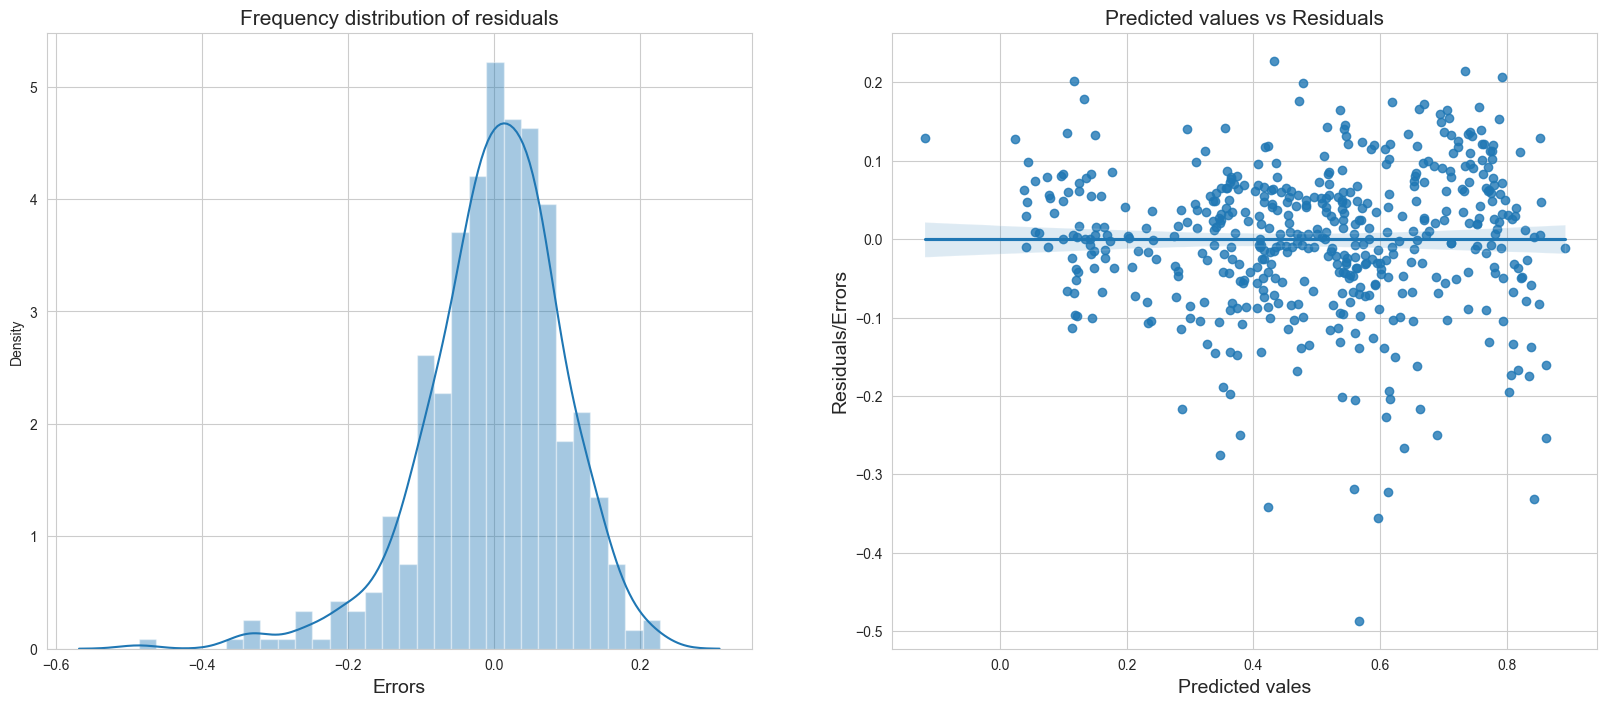

In [95]:
sns.set_style("whitegrid")
plt.figure(figsize=(20, 8))

# Plot the histogram of the error terms
plt.subplot(1,2,1)
sns.distplot((y_train - y_train_pred), bins = 30)
plt.title('Frequency distribution of residuals', fontsize = 15)                  # Plot heading 
plt.xlabel('Errors', fontsize = 14)

# Plot predicted values vs residuals
plt.subplot(1,2,2)
tempdf=pd.DataFrame({'y_train': list(y_train),'y_train_pred': list(y_train_pred), 
                     'residuals': list(y_train-y_train_pred)})
sns.regplot(x = 'y_train_pred', y = 'residuals', data = tempdf)
plt.title('Predicted values vs Residuals', fontsize = 15)                  # Plot heading 
plt.xlabel('Predicted vales', fontsize = 14)
plt.ylabel('Residuals/Errors', fontsize = 14)

plt.show()

##### Observations

- Error terms are nearly normaly distributed and m ~ 0.
- Residual errors are independent of each other since the Predicted values vs Residuals plot doesn't show any trend.
- Residuals are randomly scattered around zero without any clear trend or patters.

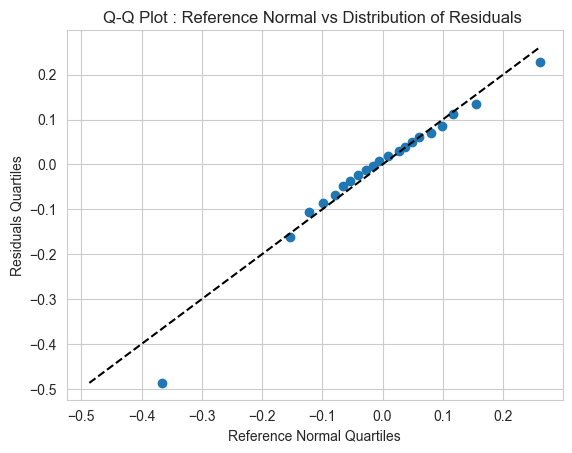

In [96]:
# Verifying the normality of distribution of residuals 
# using Q-Q plot
mean = (y_train-y_train_pred).mean()
std = (y_train-y_train_pred).std()

ref_normal = np.random.normal(mean,std,(y_train-y_train_pred).shape[0])


percentages = np.linspace(0,100,21)
ref_normal_qn = np.percentile(ref_normal, percentages)
residual_qn = np.percentile(y_train - y_train_pred , percentages)
#plt.figure(figsize=(5, 5))
plt.plot(ref_normal_qn,residual_qn, ls="", marker="o")

x = np.linspace(np.min((ref_normal_qn.min(),residual_qn.min())), np.max((ref_normal_qn.max(),residual_qn.max())))
plt.plot(x,x, color="k", ls="--")
plt.title('Q-Q Plot : Reference Normal vs Distribution of Residuals ')

plt.xlabel('Reference Normal Quartiles')
plt.ylabel('Residuals Quartiles')
plt.show()

This plot further shows that the residual distribution for taining is approximately normal.

## 3.3 Making Predictions Using the Final Model

#### 3.3.1 Applying the scaling on the test dataset

In [97]:
# transform the test dataset using scaler created using train dataset
df_test_lm=df_test.copy()
df_test_lm[num_vars] = scaler.transform(df_test_lm[num_vars])
df_test_lm.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     0.462617    0.018692    0.644860    0.574509    0.492246    0.465395   
std      0.499770    0.135751    0.479678    0.238692    0.210920    0.192140   
min      0.000000    0.000000    0.000000    0.047987   -0.053283    0.086646   
25%      0.000000    0.000000    0.000000    0.372501    0.326054    0.321752   
50%      0.000000    0.000000    1.000000    0.594137    0.480793    0.457140   
75%      1.000000    0.000000    1.000000    0.773808    0.643743    0.571250   
max      1.000000    1.000000    1.000000    1.029946    1.014870    0.996523   

              cnt  season_spring  season_summer  season_winter  ...  \
count  214.000000     214.000000     214.000000     214.000000  ...   
mean     0.495714       0.247664       0.280374       0.219626  ...   
std      0.233651       0.432667       0.450235       0.414964  ...   
min      0.033080       0.000000       0.000000       0.000000  ...   
25%      0.302487       0.000000       0.000000       0.000000  ...   
50%      0.492454       0.000000       0.000000       0.000000  ...   
75%      0.656405       0.000000       1.000000       0.000000  ...   
max      0.961487       1.000000       1.000000       1.000000  ...   

         mnth_oct    mnth_sep  weekday_Monday  weekday_Saturday  \
count  214.000000  214.000000      214.000000        214.000000   
mean     0.088785    0.070093        0.130841          0.200935   
std      0.285100    0.255903        0.338017          0.401639   
min      0.000000    0.000000        0.000000          0.000000   
25%      0.000000    0.000000        0.000000          0.000000   
50%      0.000000    0.000000        0.000000          0.000000   
75%      0.000000    0.000000        0.000000          0.000000   
max      1.000000    1.000000        1.000000          1.000000   

       weekday_Sunday  weekday_Thursday  weekday_Tuesday  weekday_Wednesday  \
count      214.000000        214.000000       214.000000         214.000000   
mean         0.135514          0.126168         0.130841           0.163551   
std          0.343074          0.332817         0.338017           0.370735   
min          0.000000          0.000000         0.000000           0.000000   
25%          0.000000          0.000000         0.000000           0.000000   
50%          0.000000          0.000000         0.000000           0.000000   
75%          0.000000          0.000000         0.000000           0.000000   
max          1.000000          1.000000         1.000000           1.000000   

       weathersit_light_snow/rain  weathersit_mist/cloudy  
count                  214.000000              214.000000  
mean                     0.023364                0.299065  
std                      0.151412                0.458922  
min                      0.000000                0.000000  
25%                      0.000000                0.000000  
50%                      0.000000                0.000000  
75%                      0.000000                1.000000  
max                      1.000000                1.000000  

[8 rows x 29 columns]

#### 3.3.2 Dividing into X_test and y_test and Predicting using the Final Model

In [98]:
y_test_lm = df_test_lm.pop('cnt')
X_test_lm = df_test_lm

In [99]:
# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test_lm)

# Dropping the extra columns from test dataset
X_test_lm = X_test_lm.drop(lm_cols_dropped, axis=1)

y_test_pred = lm.predict(X_test_lm)

#### 3.3.3 Evaluation of the Predicted results

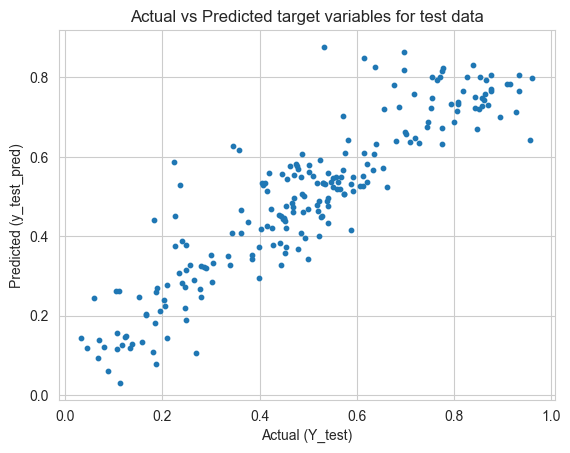

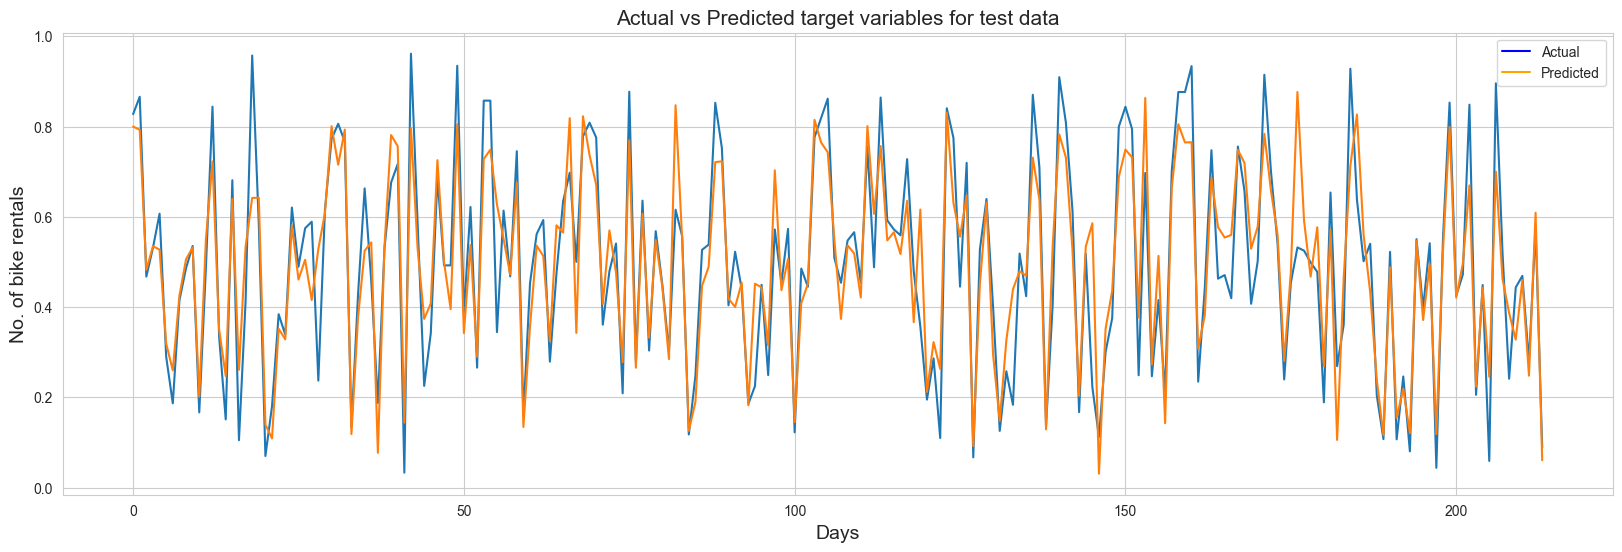

In [100]:

plt.scatter(y_test_lm, y_test_pred, s=10)
plt.title('Actual vs Predicted target variables for test data', fontsize = 12)            # Plot heading 
plt.xlabel('Actual (Y_test)', fontsize = 10)
plt.ylabel('Predicted (y_test_pred)', fontsize = 10)

from matplotlib.lines import Line2D

plt.figure(figsize=(20, 6))
plt.plot(range(len(y_test_lm)),y_test_lm)
plt.plot(range(len(y_test_pred)),y_test_pred)
plt.title('Actual vs Predicted target variables for test data', fontsize = 15)            # Plot heading 
plt.xlabel('Days', fontsize = 14)
plt.ylabel('No. of bike rentals', fontsize = 14)
legend_elements = [Line2D([0], [0], color='blue', label='Actual'),  
                   Line2D([0], [0], color='orange', label='Predicted') ] 
plt.legend(handles=legend_elements)

#### 3.3.4 R-squared value for Test data

In [101]:
from sklearn.metrics import r2_score

In [102]:
# evaluate R2
r2 =r2_score(y_true=y_test_lm, y_pred=y_test_pred)
adjusted_r2 = round(1-(1-r2)*(X_test_lm.shape[0]-1)/(X_test_lm.shape[0]-X_test_lm.shape[1]-1),4)
print(f'R-squared on test data: {r2:.4f}')
print(f'Adjusted R-squared on test data: {adjusted_r2:.4f}')

R-squared on test data: 0.8174
Adjusted R-squared on test data: 0.8074


#### Observation
- Predicted vs observed value plots shows that the model is reasonably accurate.
- Has a R-squared score of .815 for test data, which is reasonably good.

# 4 Conclusion

In this analysis, mixed feature selection approach is used. Using Recusrsive Feature Elimination (RFE), 20 features were selected first. Further feature selection has been done manually by looking at P-value and VIF value. 9 most significant features are selected.

R-squared on train data: 0.8300; 
Adjusted R-squared on train data: 0.8269

R-squared on test data: 0.8153; 
Adjusted R-squared on test data: 0.8063

Based on these values, it can be inferred that your model is performing reasonably well. It explains a substantial portion of the variance in the dependent variable and generalizes to unseen data reasonably well.


In [103]:
lm.params

const                         0.212900
yr                            0.241164
temp                          0.436786
hum                          -0.090816
season_spring                -0.122163
season_winter                 0.101722
mnth_dec                     -0.053595
mnth_nov                     -0.077451
mnth_sep                      0.059700
weathersit_light_snow/rain   -0.222036
weathersit_mist/cloudy       -0.061688
dtype: float64

The given dataset has been randomly divided into training and test data in 70:30 ratio. Final Model built on training dataset explains 83% of the variability and achieves 81.5% on test data.

The final relationship between the target variable and predictors:

##### `cnt` = 0.188007 + 0.244738 `yr` + 0.415225 `temp` - 0.124480 `season_spring` + 0.095817 `season_winter` - 0.057084 `mnth_dec` - 0.077184 `mnth_nov` + 0.052773 `mnth_sep` - 0.265056 `weathersit_light_snow/rain` - 0.082345 `weathersit_mist/cloudy`

where `temp` and `cnt` are both normalized.

The demand increases in clear weather condition in relatively high temperature. So the company should focus on giving more discounts during these days especially in the season `fall`. 